# Bayesian Final Project: Projecting NBA Basketball Season Wins
## A. Conjugate Prior Approach
### (Nick Clifford, Brigitte Hogan, Kevin Malloy)

In [29]:
import pandas as pd
import os

In [30]:
dat_clean = pd.read_csv("bask_clean.csv", dtype={'Abb':'category'})
dat_clean.head() 

Unnamed: 0     City     Team  Abb   Year  Final  Games  Loss  Proj  Wins
0           0  Atlanta    Hawks  ATL  16-17   43.0   22.0  12.0  43.5  10.0
1           1  Atlanta    Hawks  ATL  17-18   24.0   23.0  18.0  25.5   5.0
2           2  Atlanta    Hawks  ATL  18-19   29.0   25.0  20.0  23.5   5.0
3           3  Atlanta    Hawks  ATL  19-20    NaN   22.0  17.0  32.5   5.0
4           4   Boston  Celtics  BOS  16-17   53.0   21.0   9.0  52.5  12.0

In [31]:
#The posterior is θ|Y ∼ Beta(a + Y, b + n − Y), y is number of successes, n is number of trials

factor = 0.4
a = dat_clean["Proj"] 
b = (82 - dat_clean["Proj"])

yy = dat_clean['Wins']
n = dat_clean['Games']

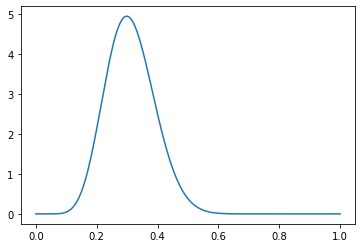

In [32]:
from scipy import stats
from scipy.stats import beta
import numpy as np
beta(a[1]*factor, b[1]*factor)
import matplotlib.pyplot as plt

x = np.linspace(0,1,200)
y = stats.beta(a[1]*factor, b[1]*factor).pdf(x)

plt.plot(x, y)

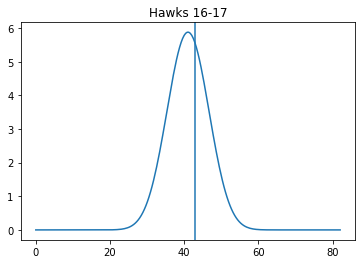

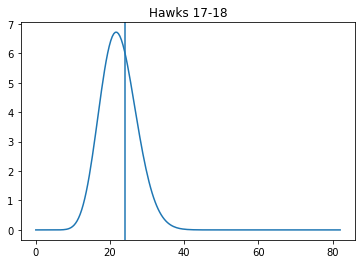

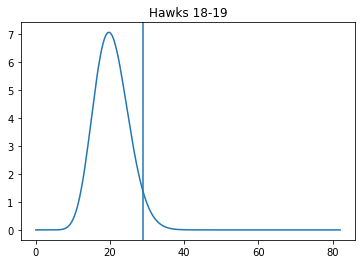

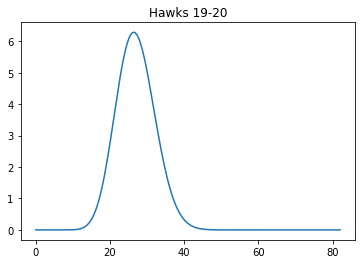

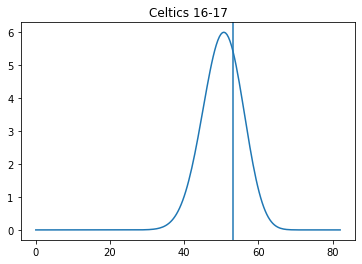

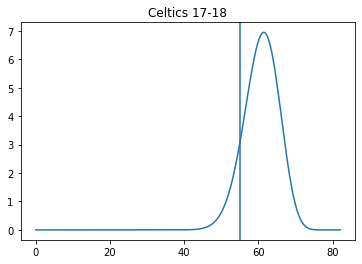

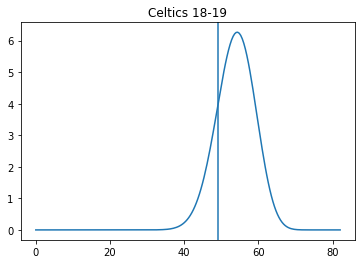

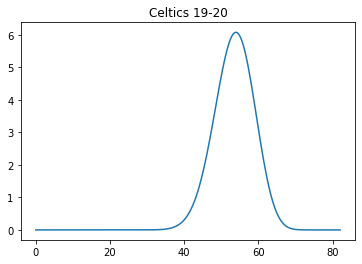

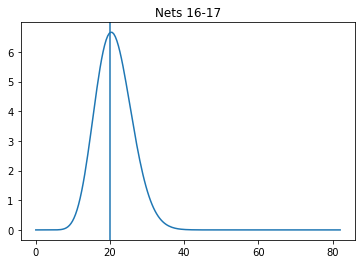

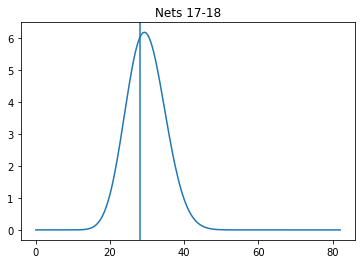

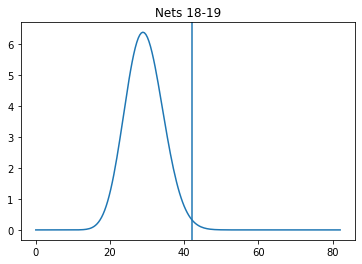

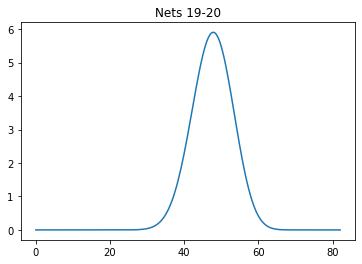

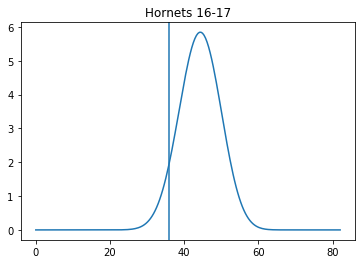

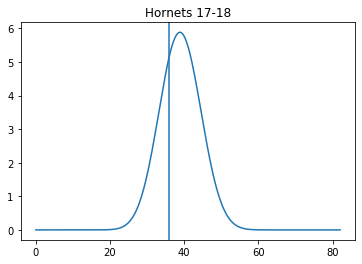

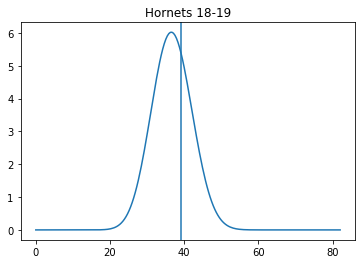

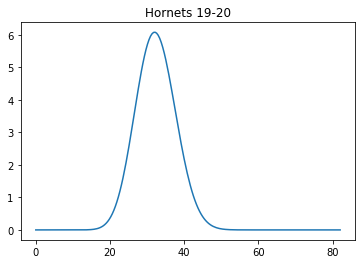

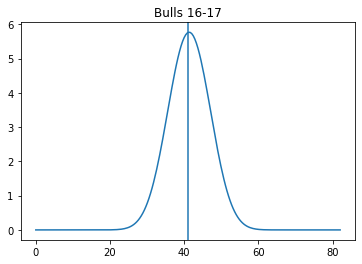

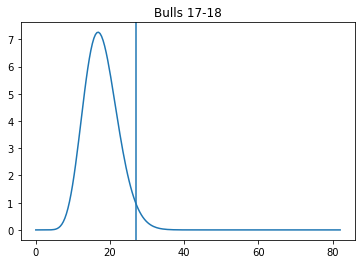

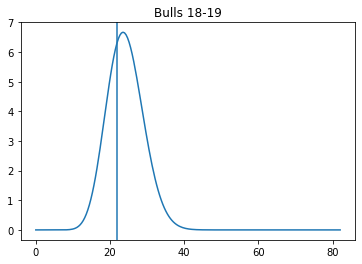

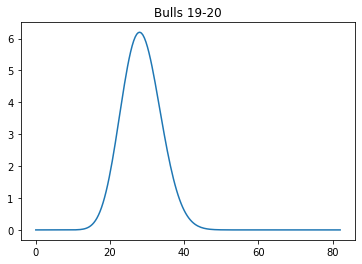

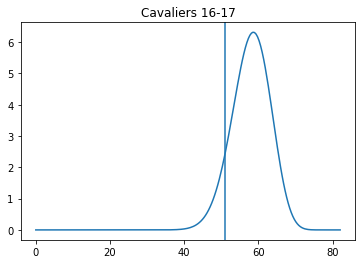

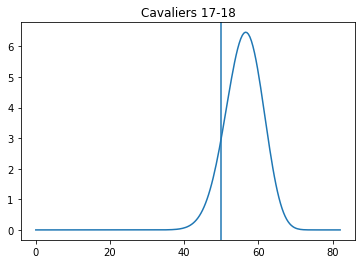

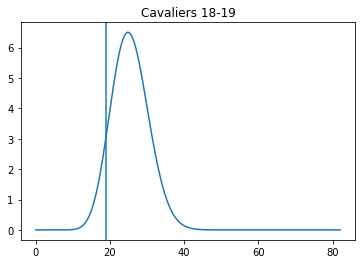

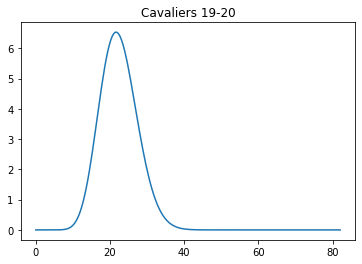

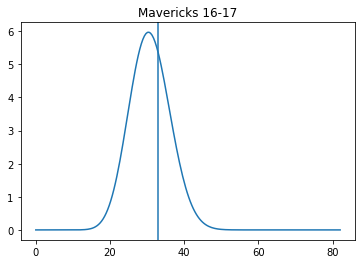

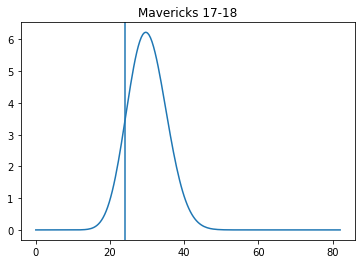

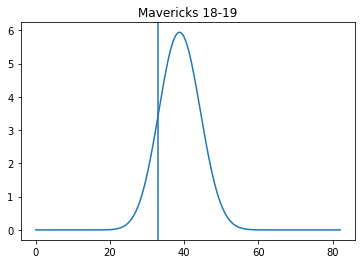

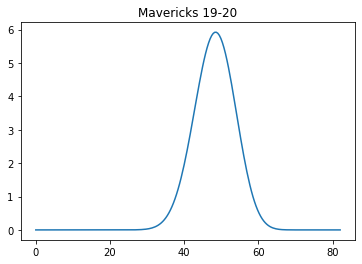

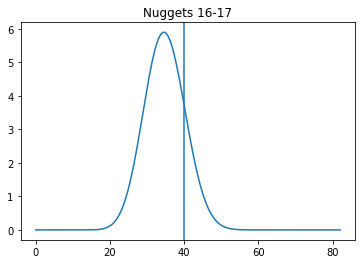

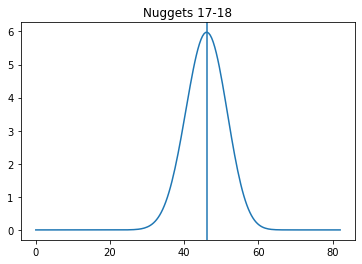

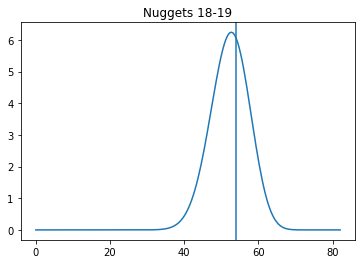

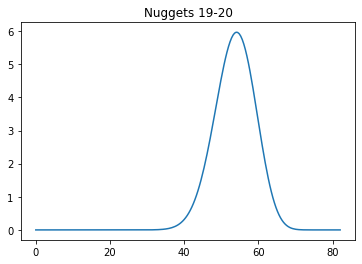

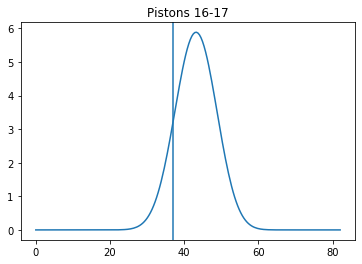

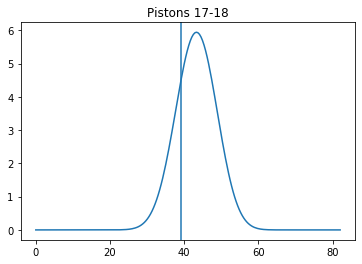

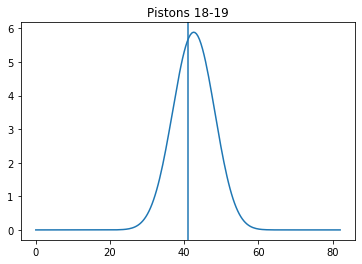

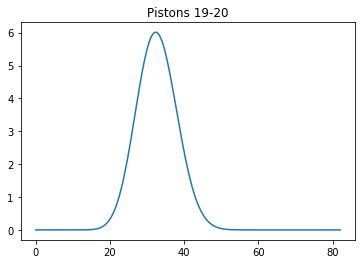

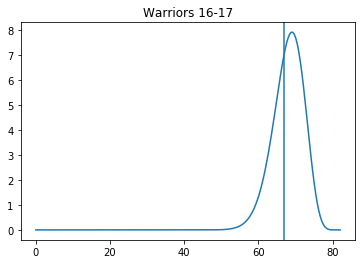

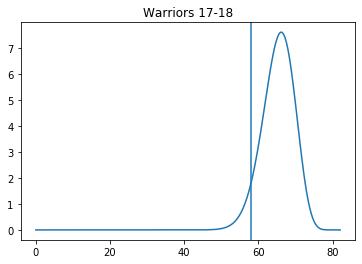

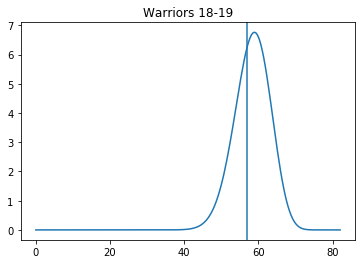

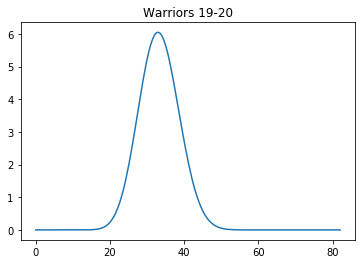

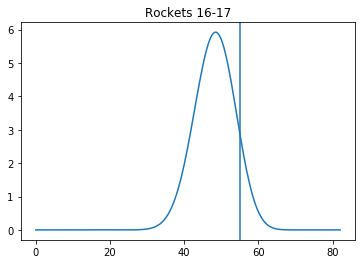

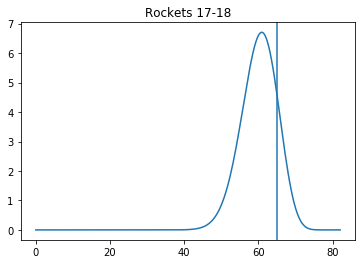

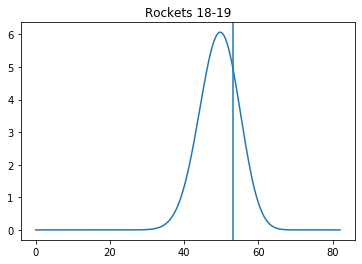

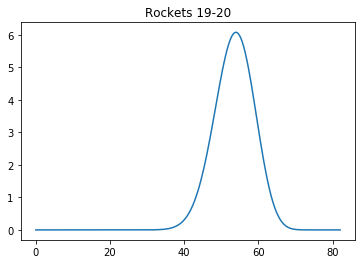

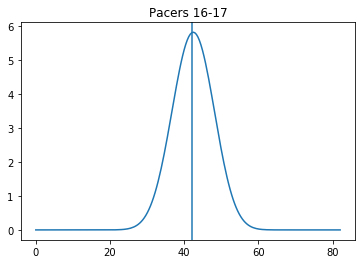

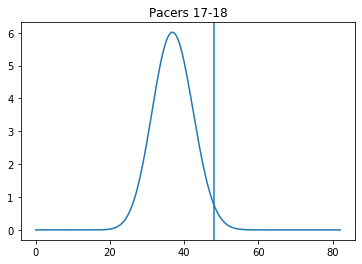

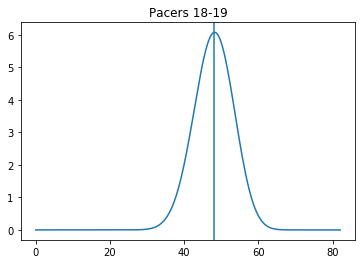

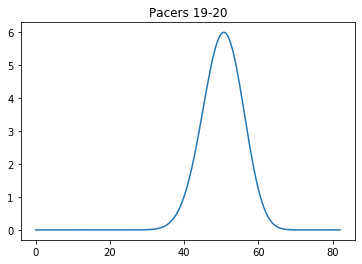

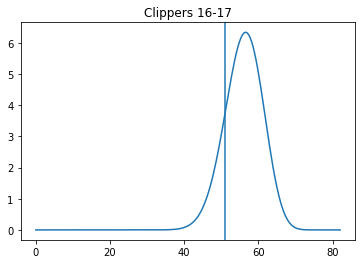

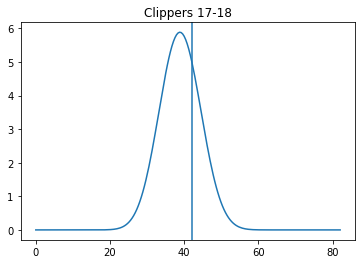

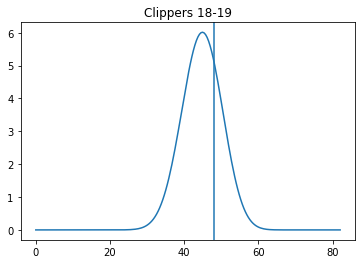

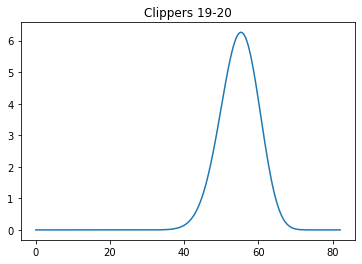

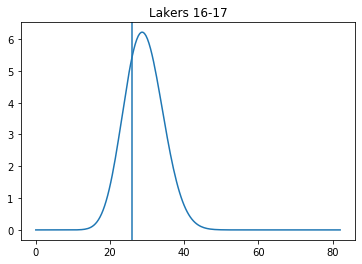

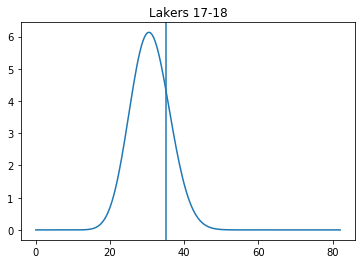

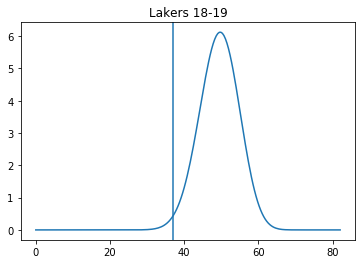

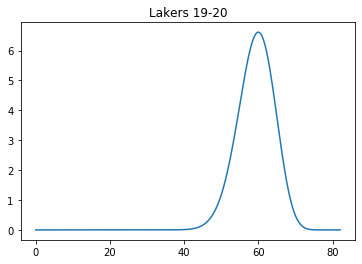

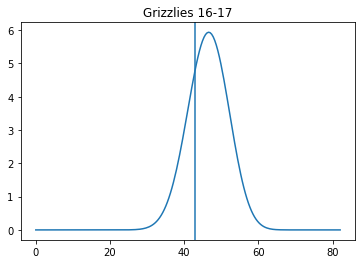

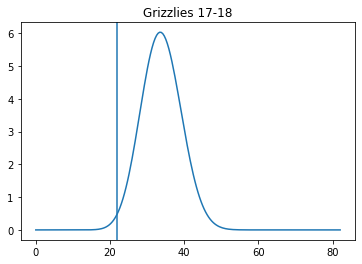

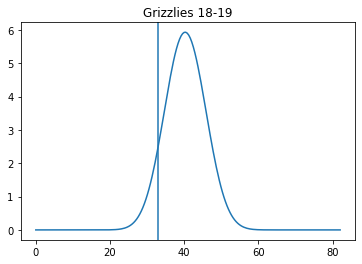

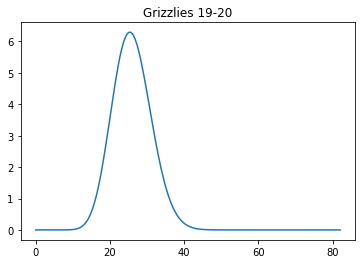

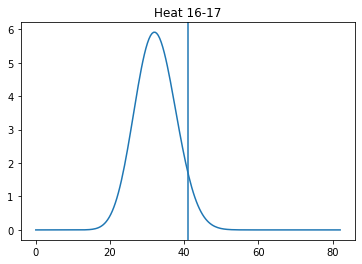

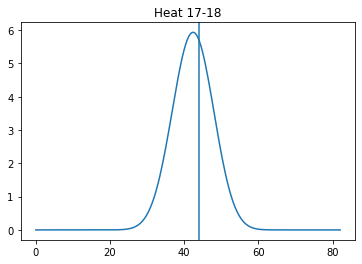

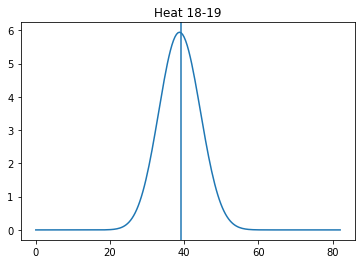

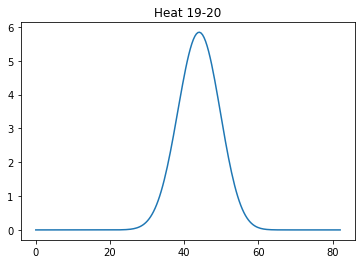

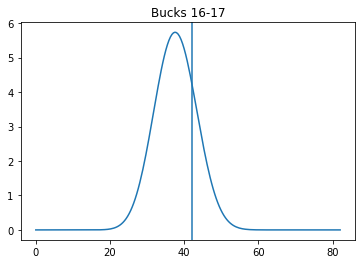

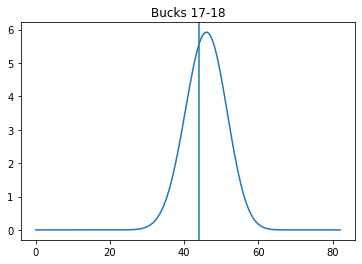

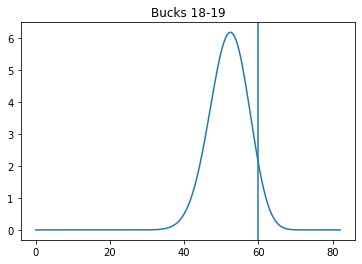

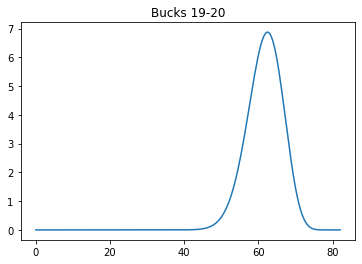

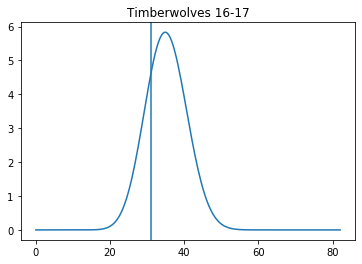

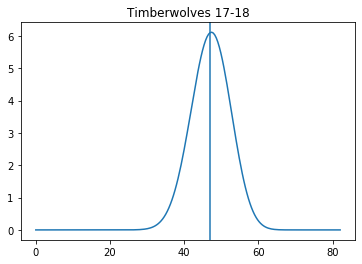

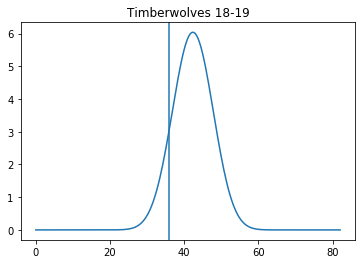

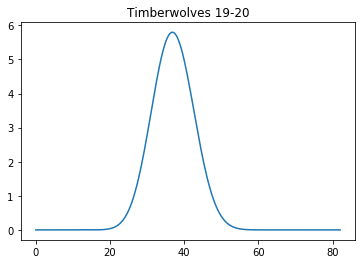

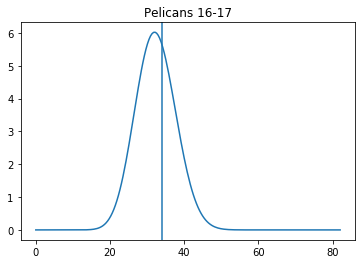

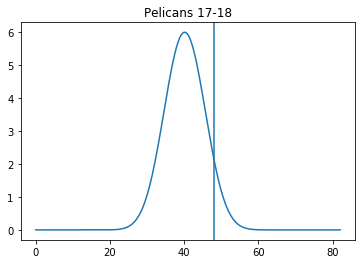

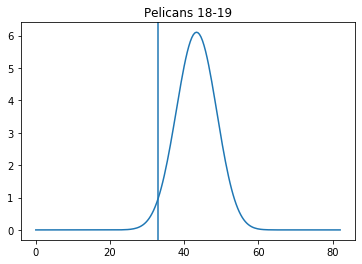

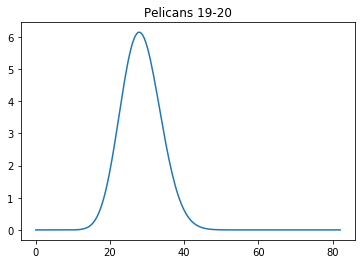

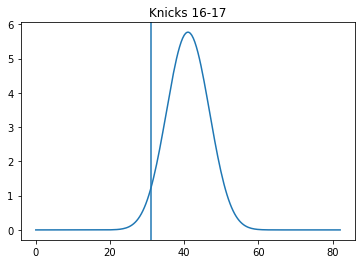

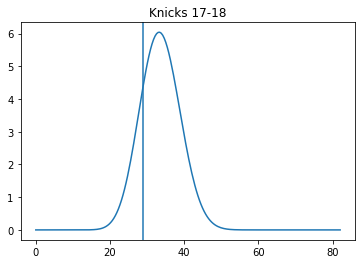

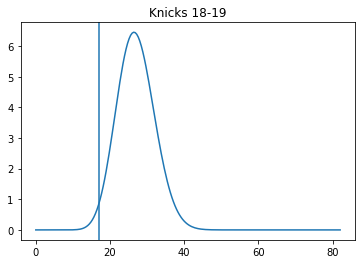

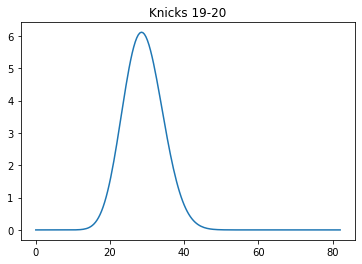

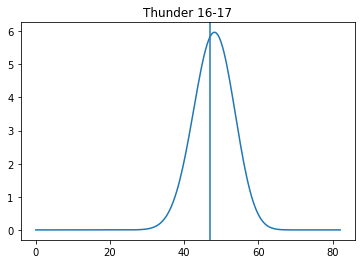

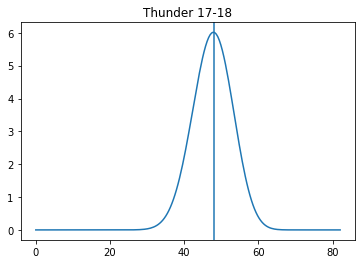

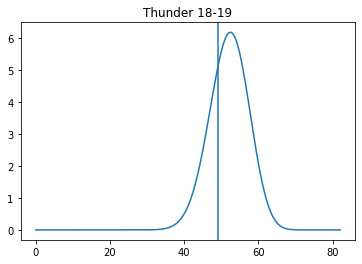

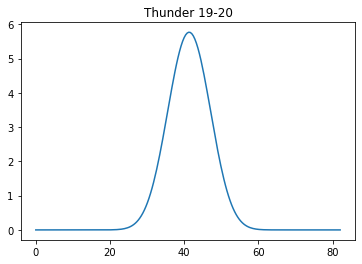

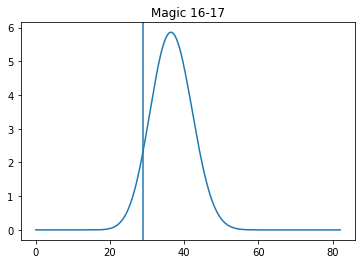

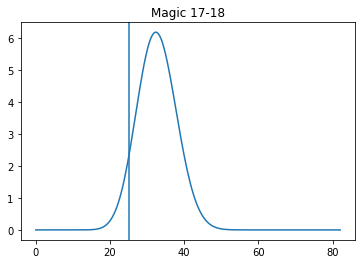

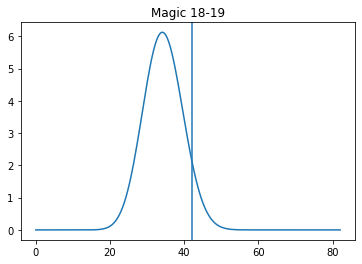

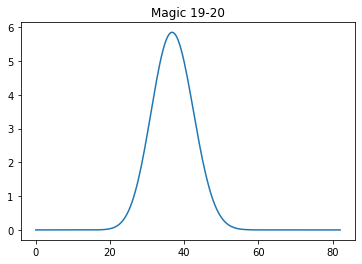

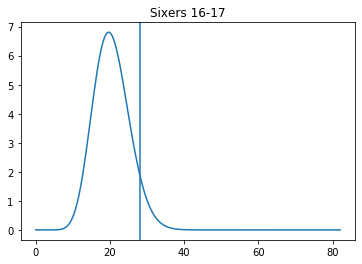

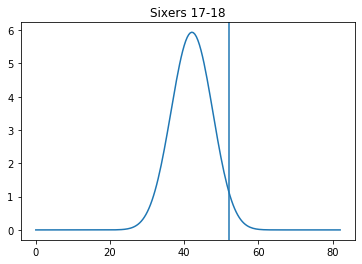

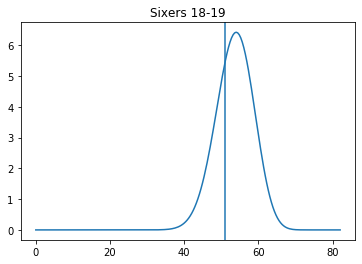

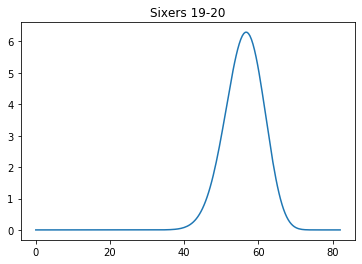

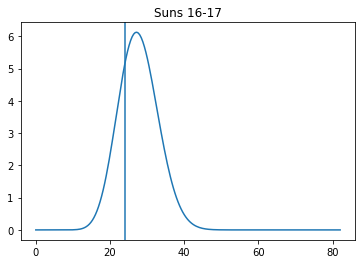

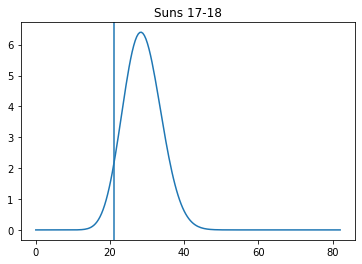

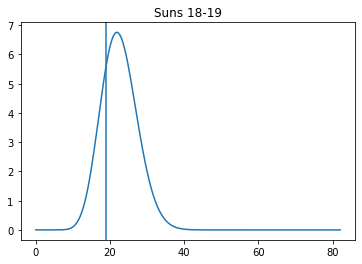

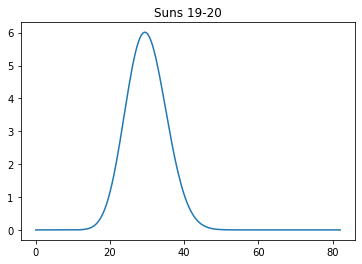

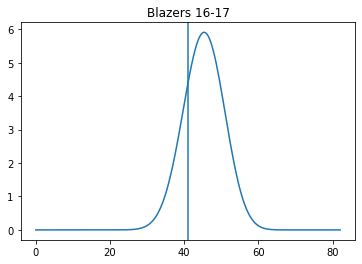

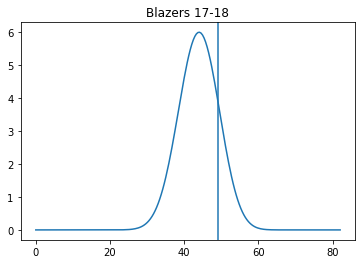

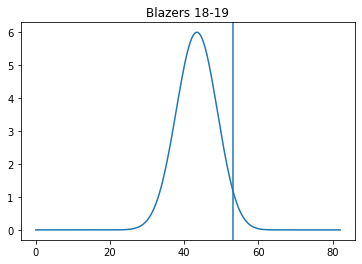

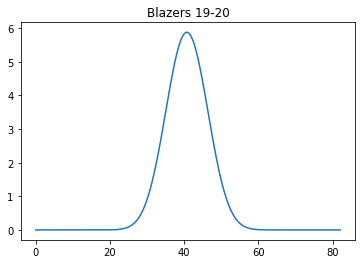

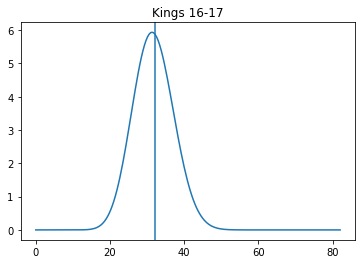

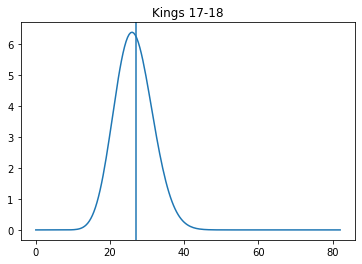

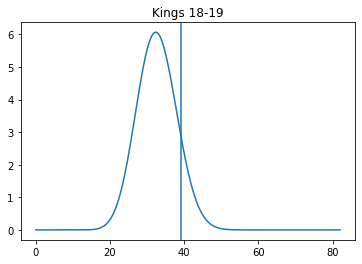

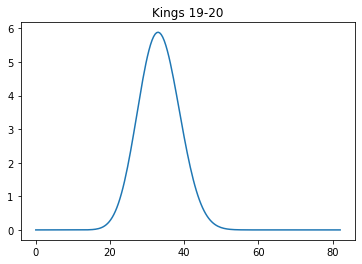

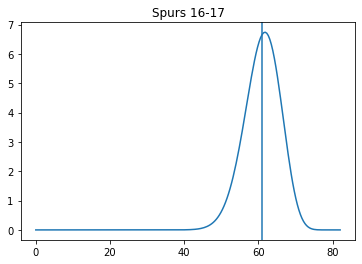

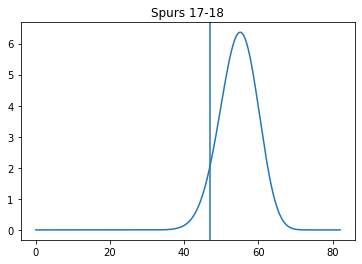

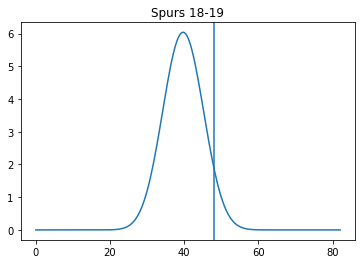

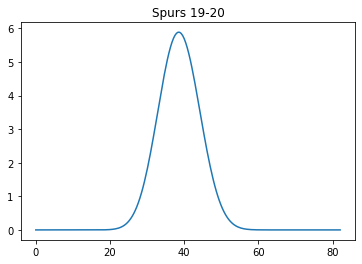

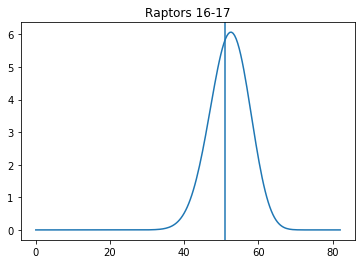

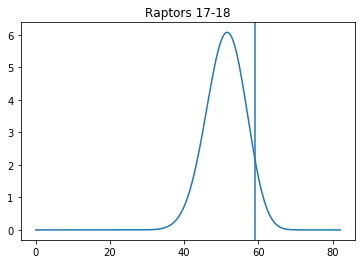

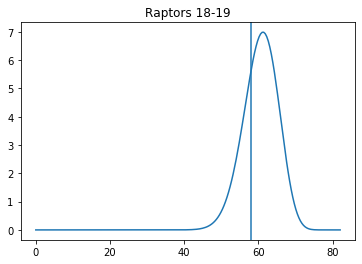

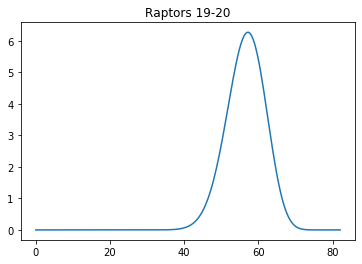

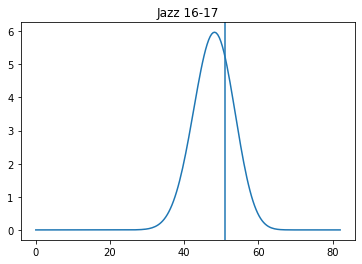

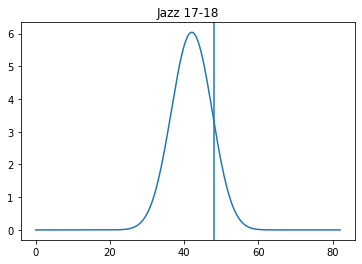

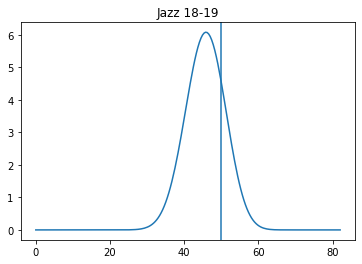

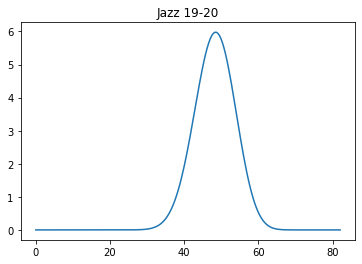

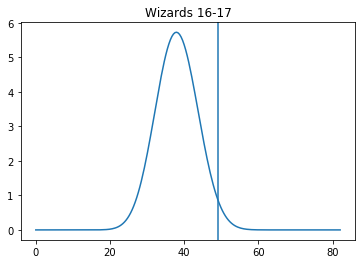

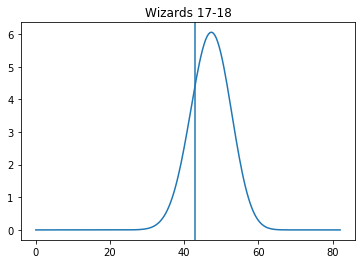

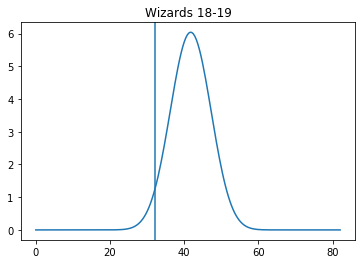

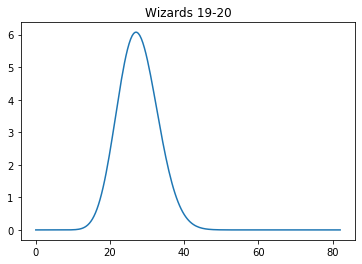

In [33]:
factor = 0.4
maps = []
for i in range(len(dat_clean['Proj'])):
    x = np.linspace(0,1,200)
    y = stats.beta(a[i]*factor + yy[i], b[i]*factor + n[i] - yy[i]).pdf(x)
    maps.append(np.argmax(y))

    plt.plot(x *82, y)
    plt.title(str(dat_clean["Team"][i]) + " " +str(dat_clean["Year"][i]))
    plt.axvline(x=dat_clean["Final"][i])
    plt.show()

In [34]:
dat_diff = np.abs(dat_clean['Final'] - dat_clean['Proj'])
dat_diff.head()
dat_diff = dat_diff[np.logical_not(np.isnan(dat_diff))]

maps = np.asarray(maps)
exes = (maps / 200) * 82
test = np.delete(exes, np.arange(3, exes.size, 4))
len(test)
dat_final = dat_clean["Final"][np.logical_not(np.isnan(dat_clean["Final"]))]

diffs_final = np.abs(dat_final - test)
print(np.mean(diffs_final))
print(np.median(diffs_final))
print(test[0])

4.945666666666666
4.404999999999998
40.589999999999996


Text(0.5, 1.0, 'Moderate Prior Approach')

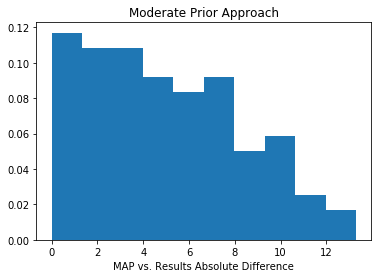

In [35]:
plt.hist(diffs_final, density = True)
plt.xlabel("MAP vs. Results Absolute Difference")
plt.title("Moderate Prior Approach")

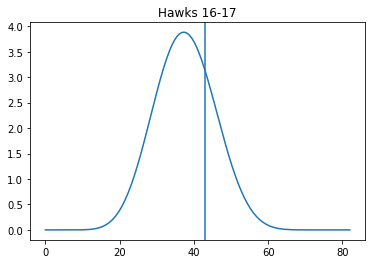

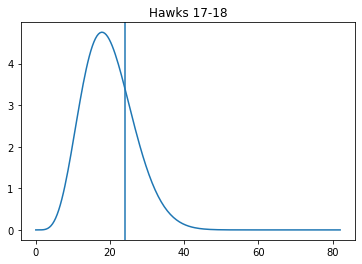

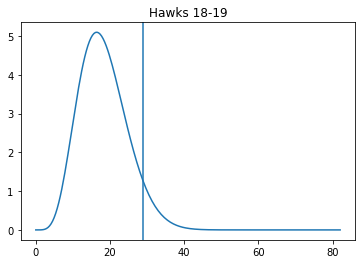

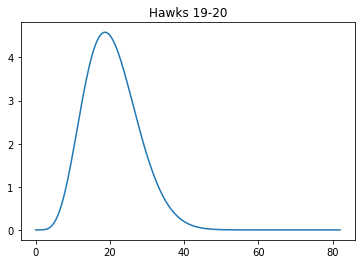

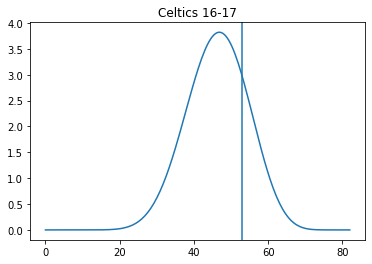

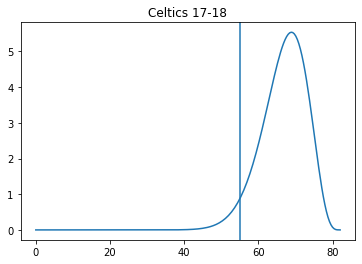

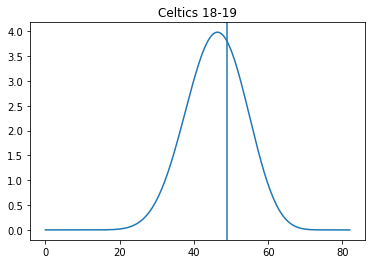

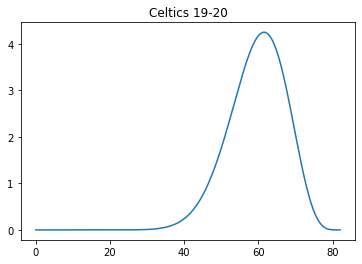

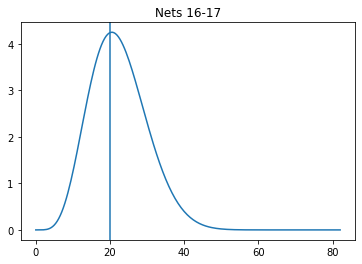

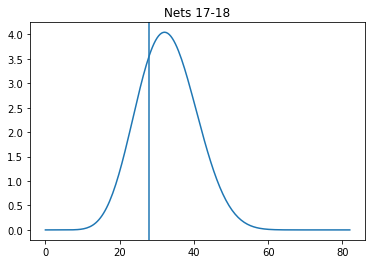

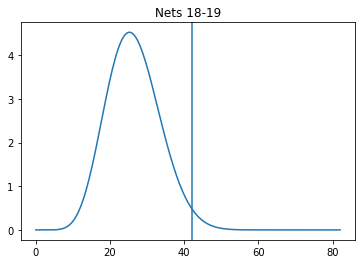

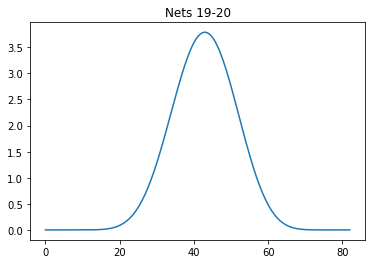

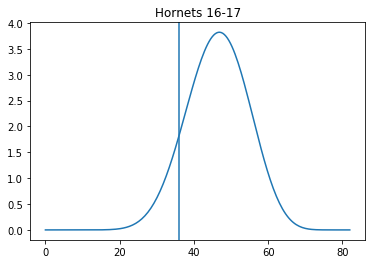

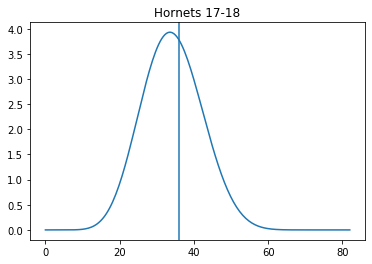

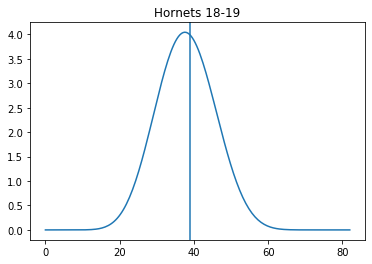

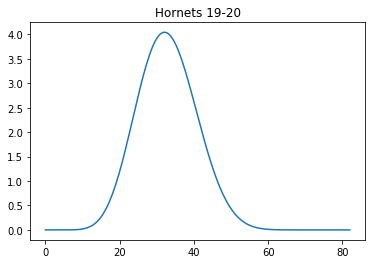

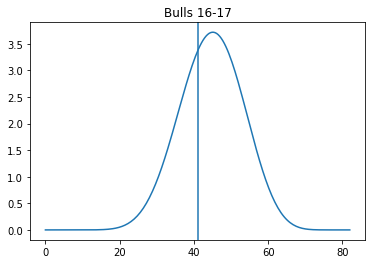

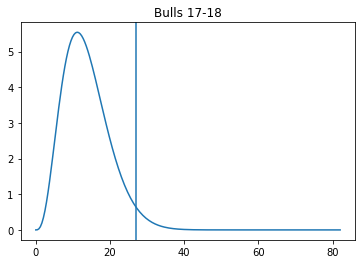

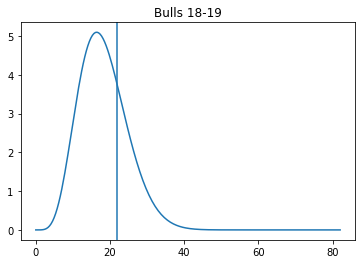

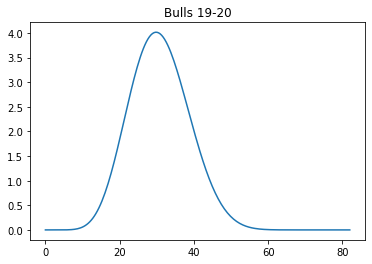

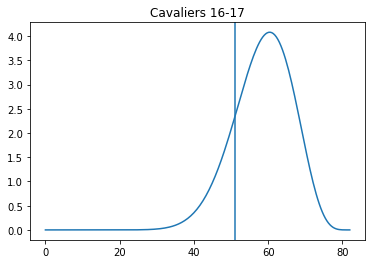

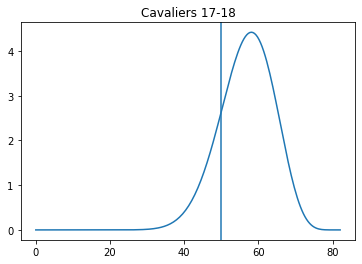

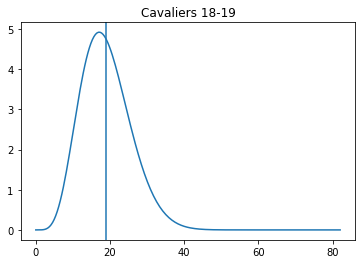

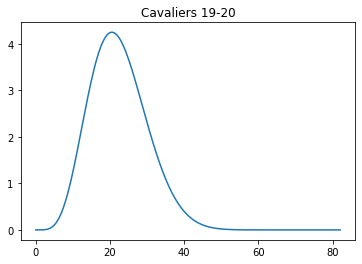

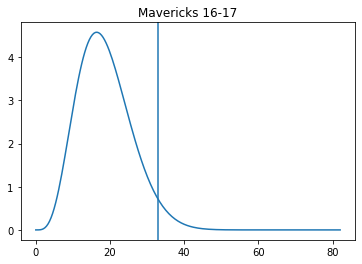

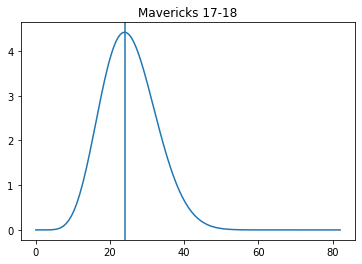

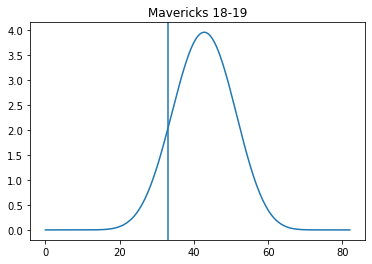

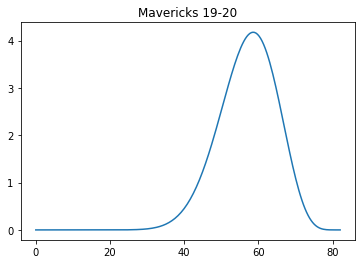

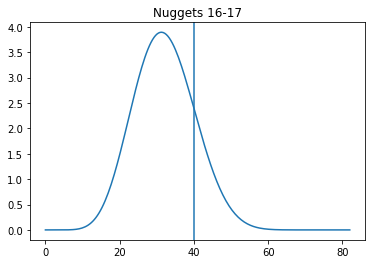

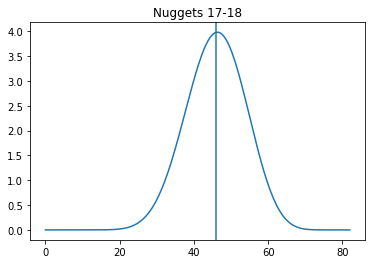

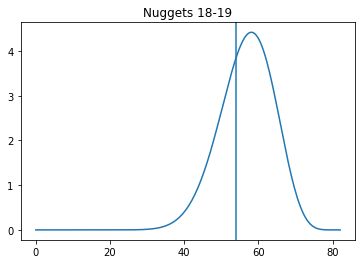

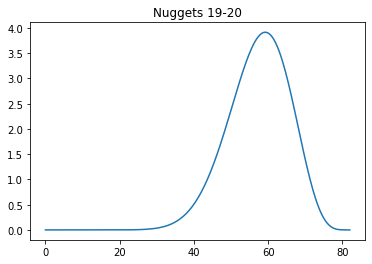

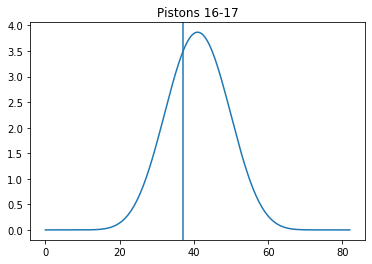

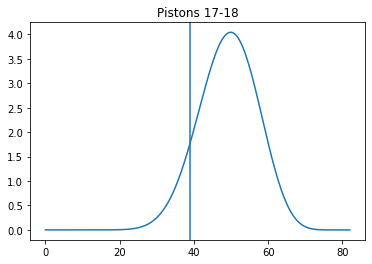

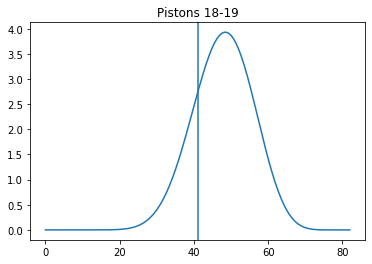

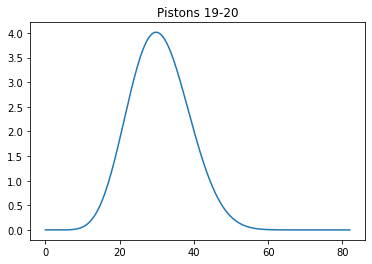

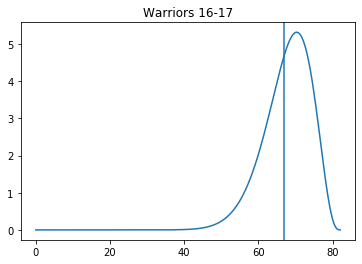

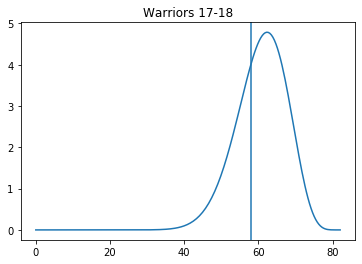

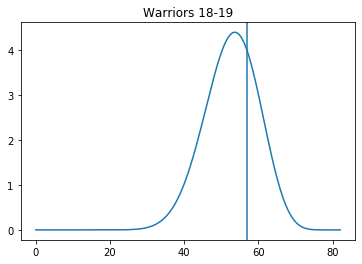

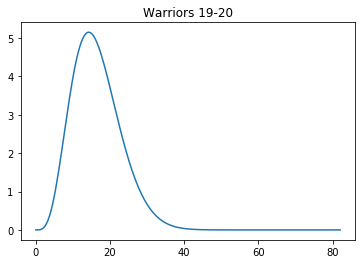

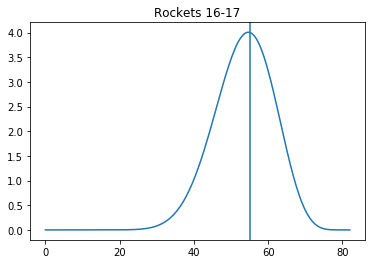

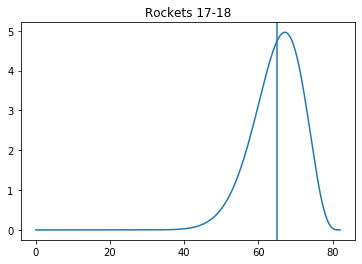

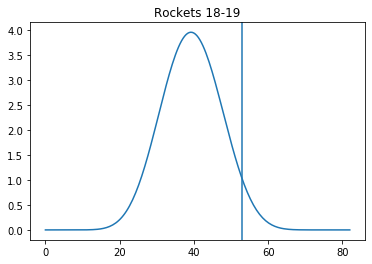

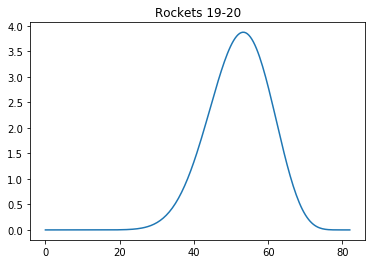

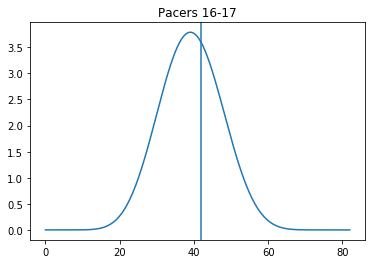

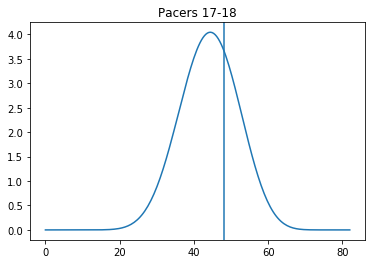

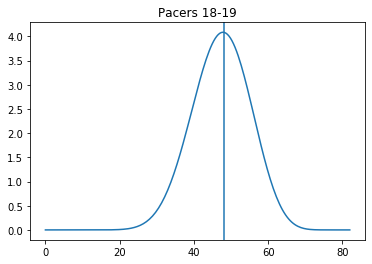

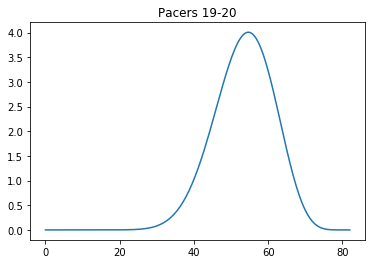

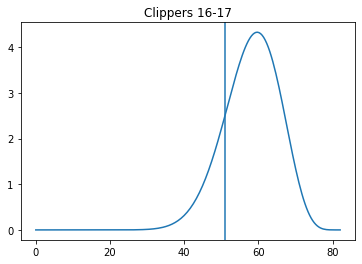

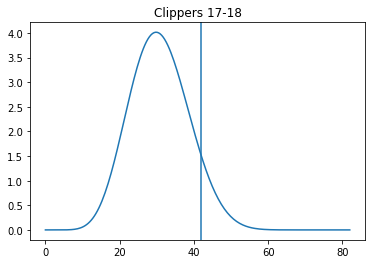

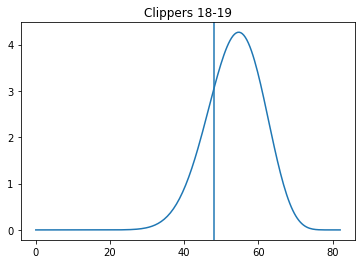

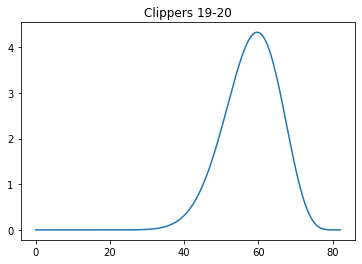

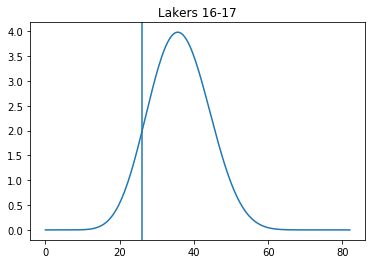

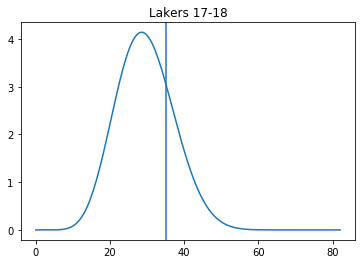

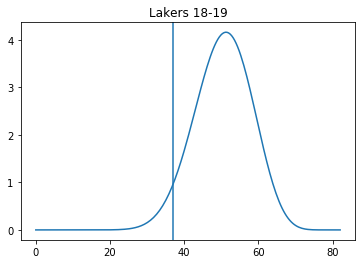

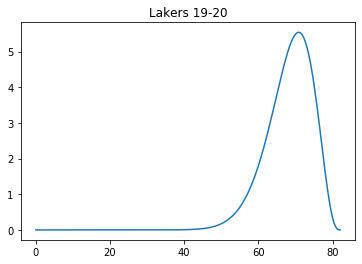

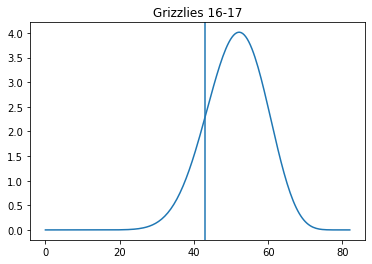

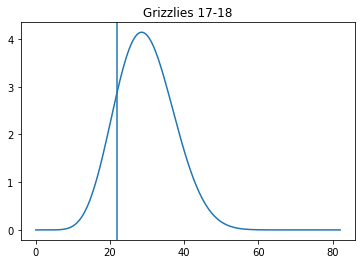

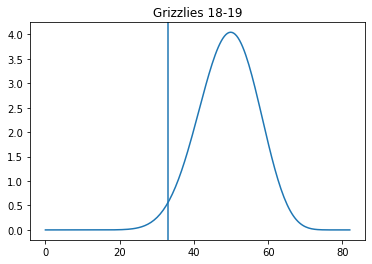

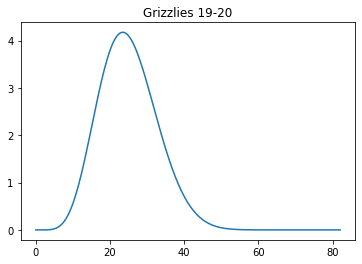

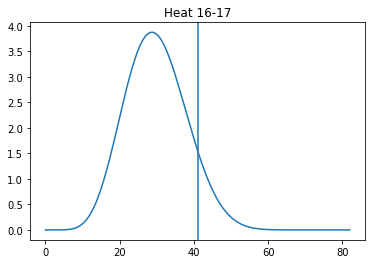

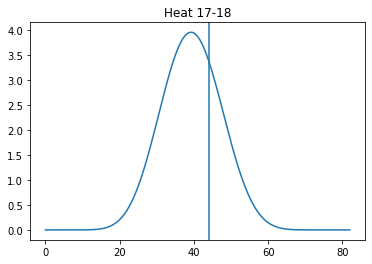

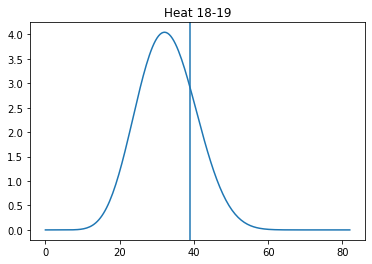

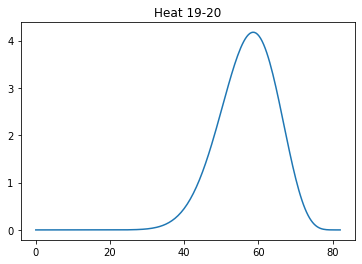

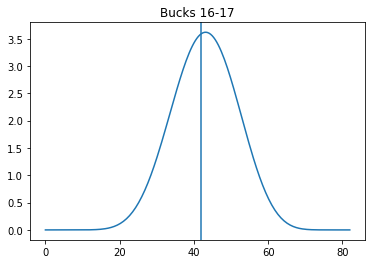

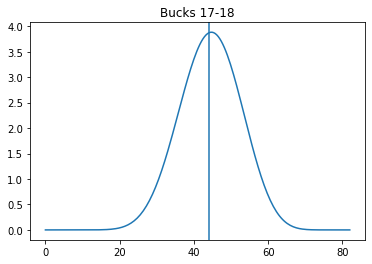

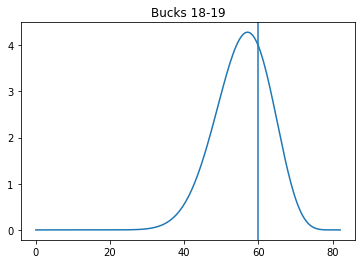

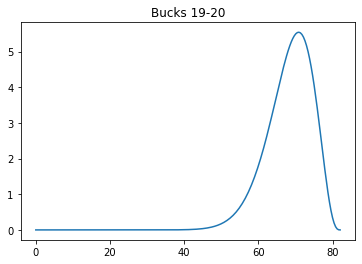

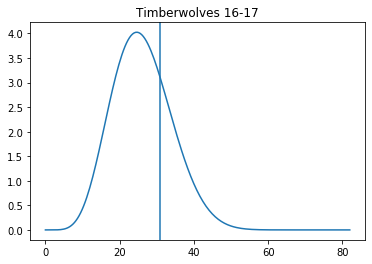

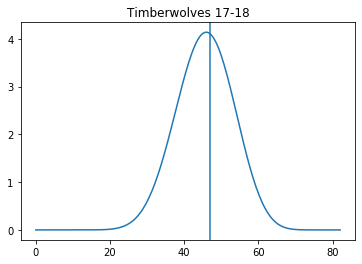

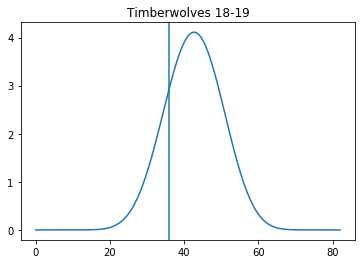

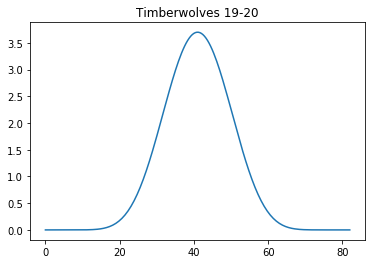

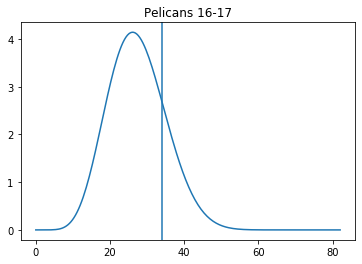

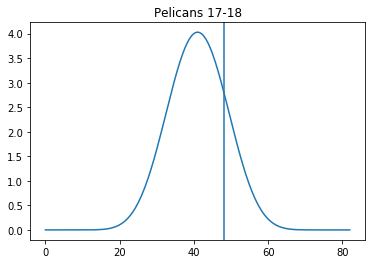

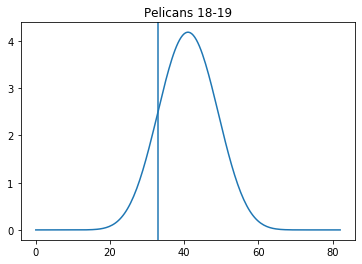

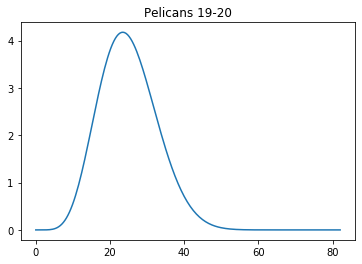

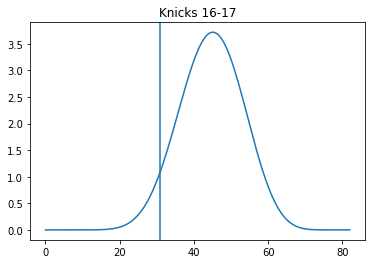

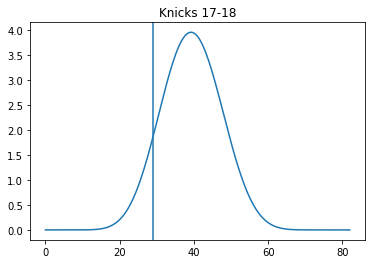

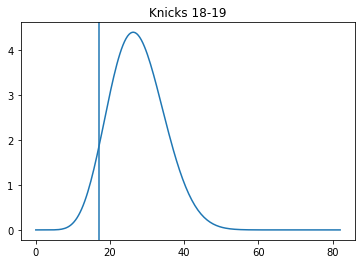

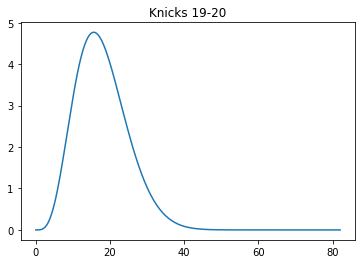

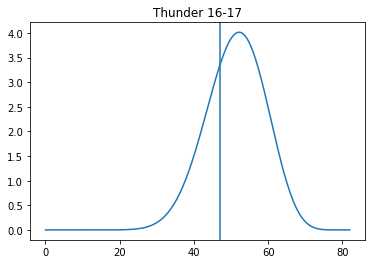

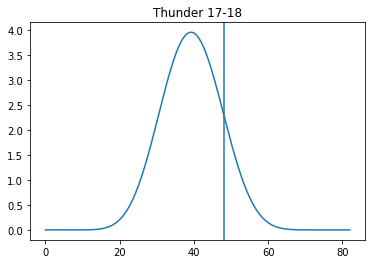

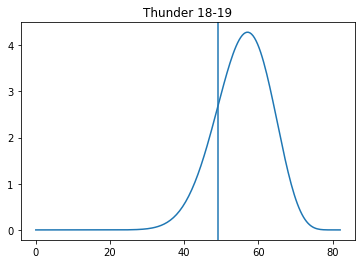

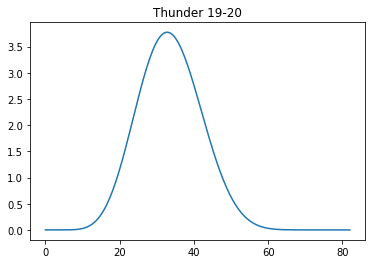

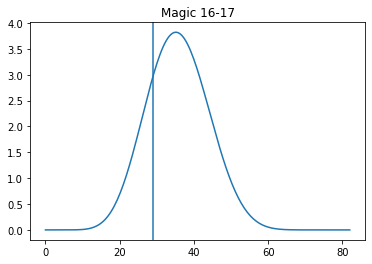

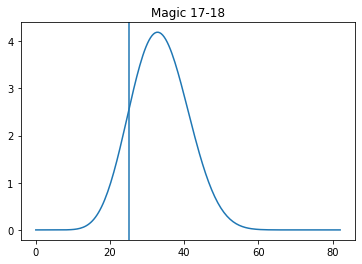

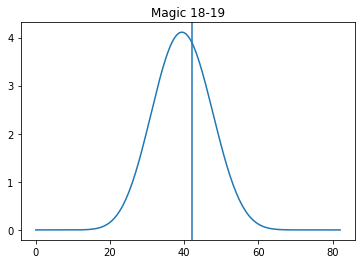

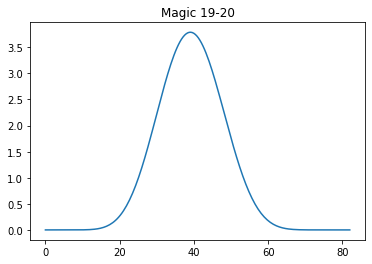

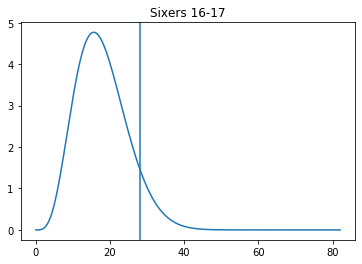

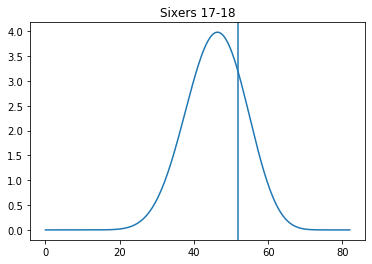

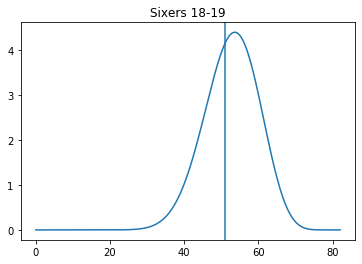

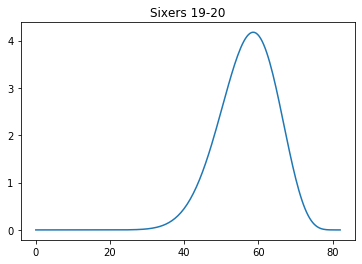

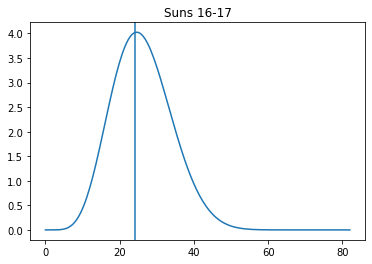

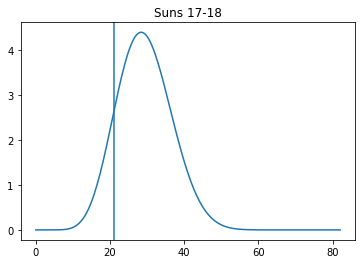

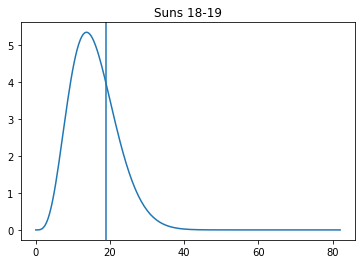

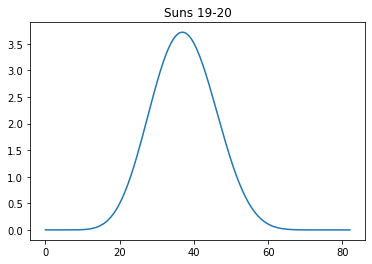

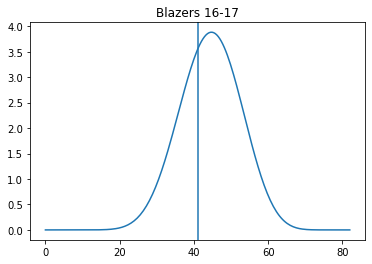

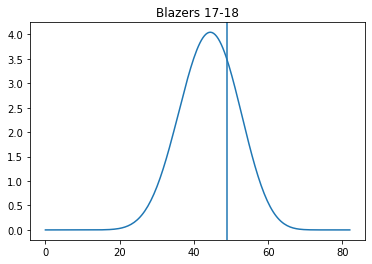

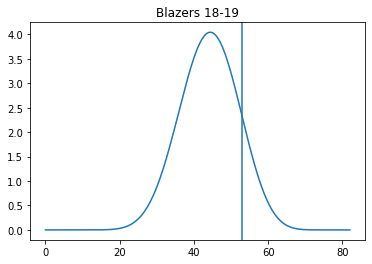

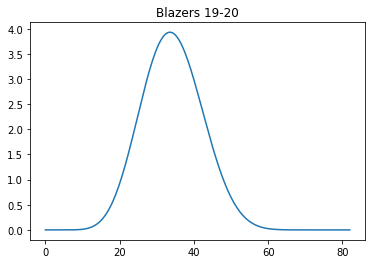

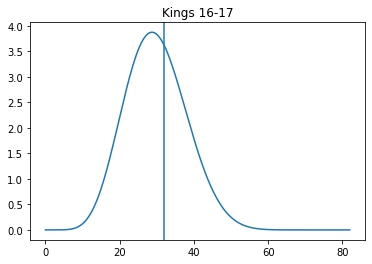

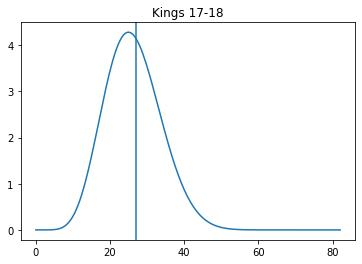

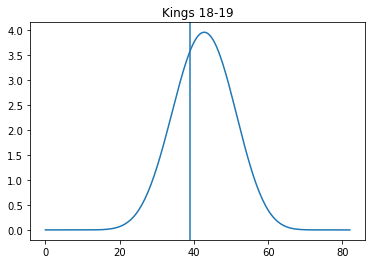

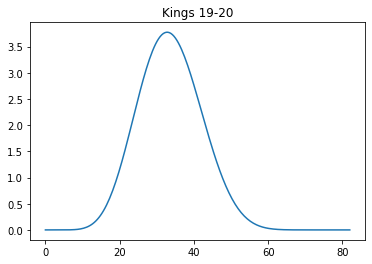

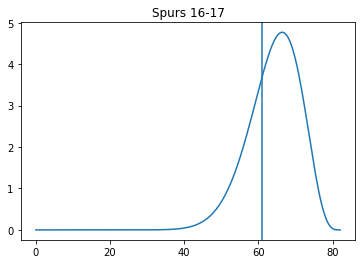

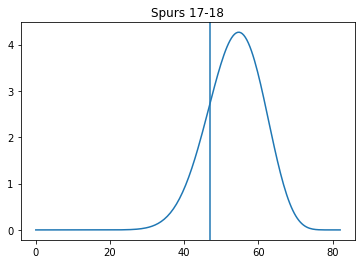

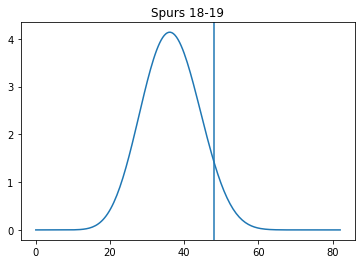

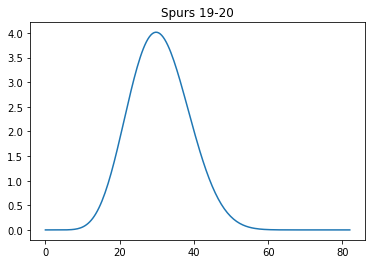

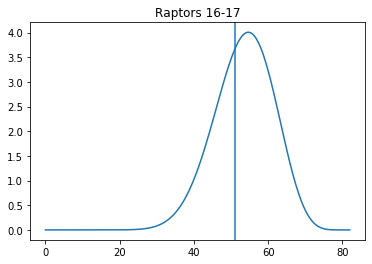

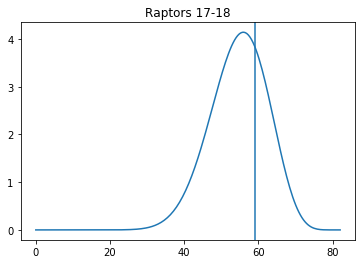

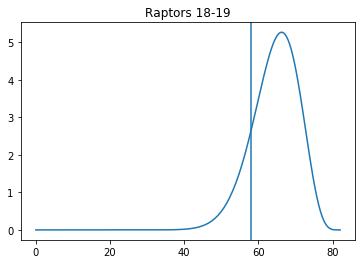

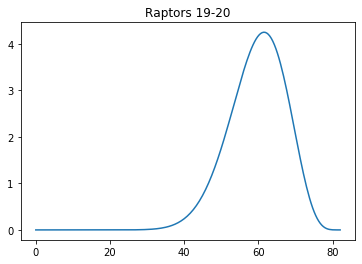

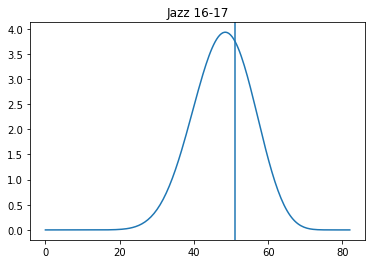

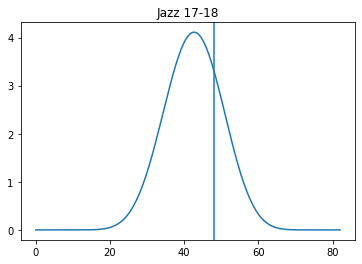

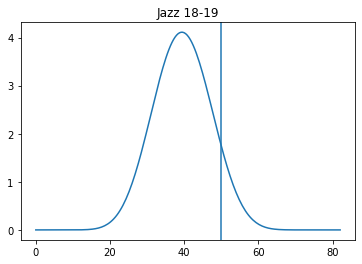

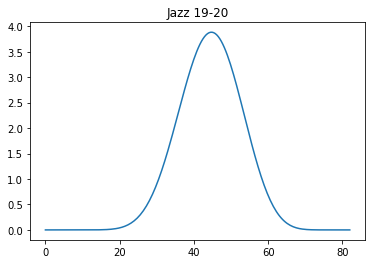

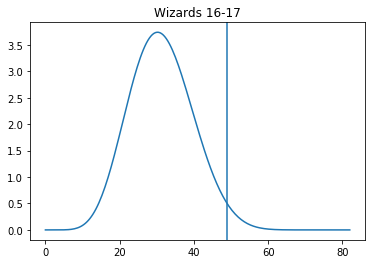

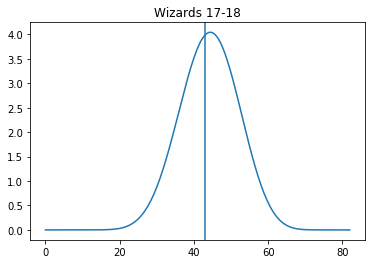

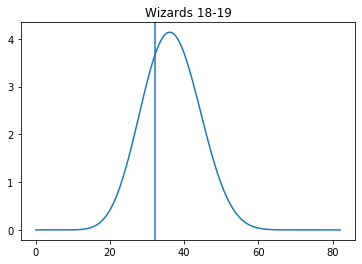

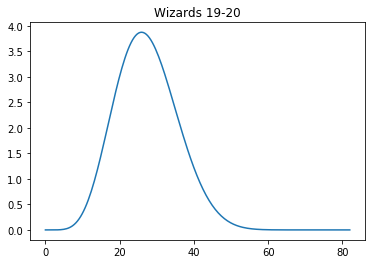

In [36]:
maps = []
for i in range(len(dat_clean['Proj'])):
    x = np.linspace(0,1,200)
    y = stats.beta(1 + yy[i], 1 + n[i] - yy[i]).pdf(x)
    maps.append(np.argmax(y))

    plt.plot(x *82, y)
    plt.title(str(dat_clean["Team"][i]) + " " +str(dat_clean["Year"][i]))
    plt.axvline(x=dat_clean["Final"][i])
    plt.show()

In [37]:
maps = np.asarray(maps)
exes = (maps / 200) * 82
test = np.delete(exes, np.arange(3, exes.size, 4))
dat_final = dat_clean["Final"][np.logical_not(np.isnan(dat_clean["Final"]))]

diffs_final = np.abs(dat_final - test)
print(np.mean(diffs_final))
print(np.median(diffs_final))
print(test[0])

6.599555555555556
6.165000000000003
36.9


(array([0.07021239, 0.11702065, 0.05851033, 0.09946756, 0.06436136,
        0.0351062 , 0.02925516, 0.02340413, 0.02340413, 0.00585103]),
 array([ 0.08 ,  1.979,  3.878,  5.777,  7.676,  9.575, 11.474, 13.373,
        15.272, 17.171, 19.07 ]),
 <a list of 10 Patch objects>)

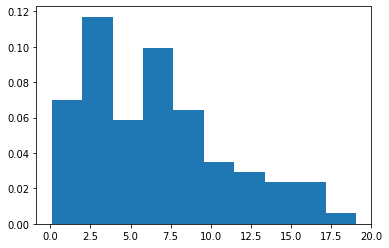

In [38]:
plt.hist(diffs_final, density = True)

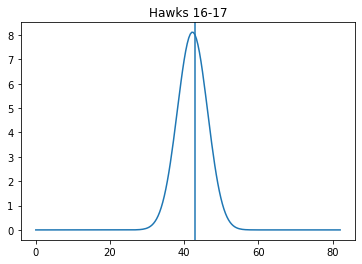

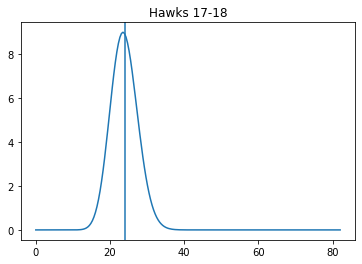

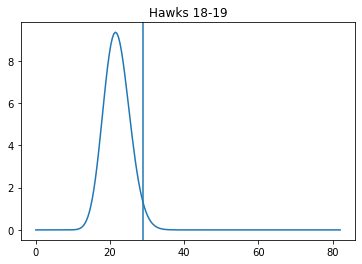

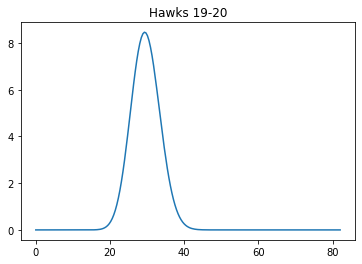

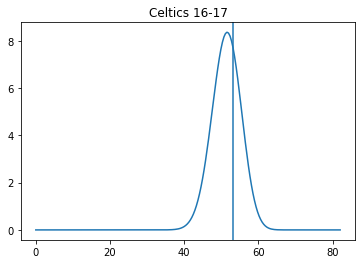

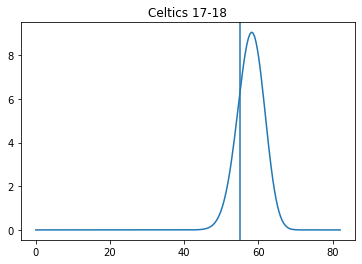

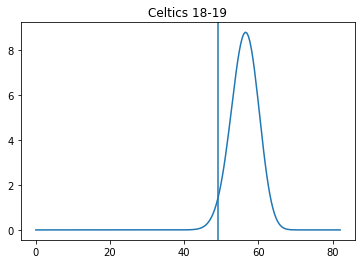

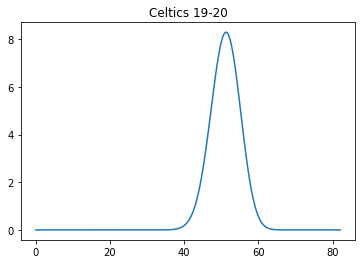

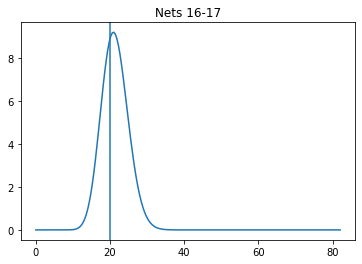

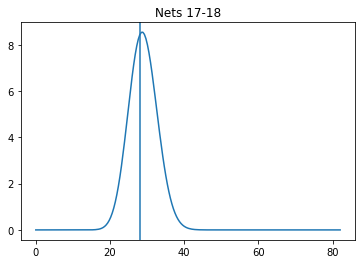

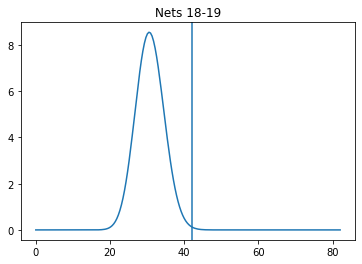

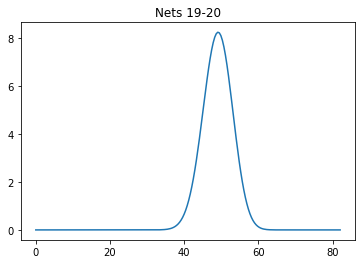

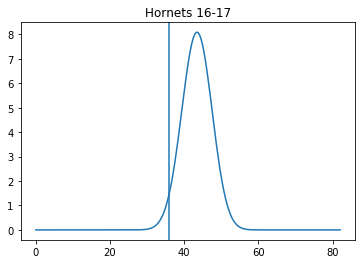

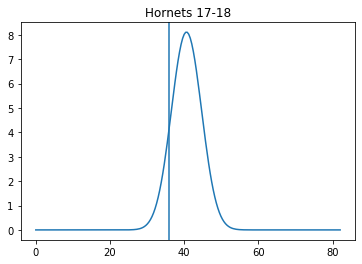

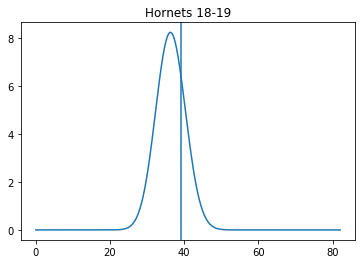

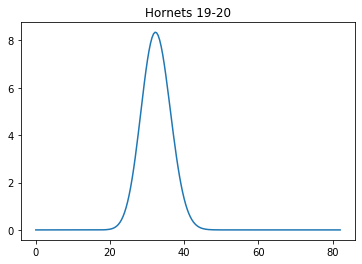

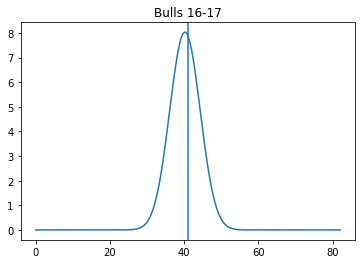

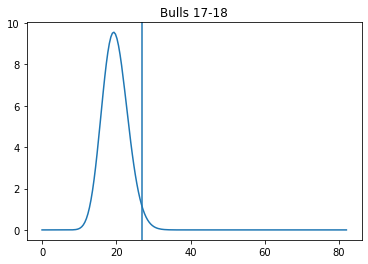

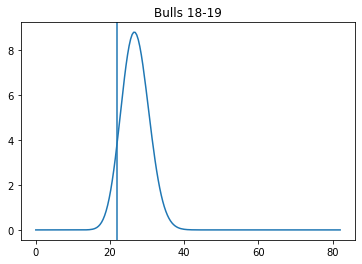

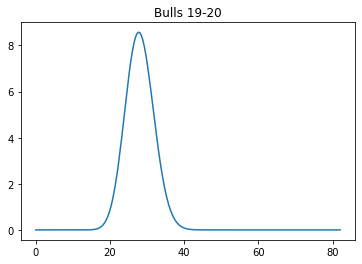

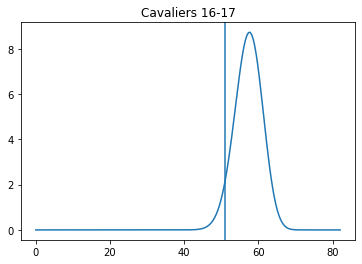

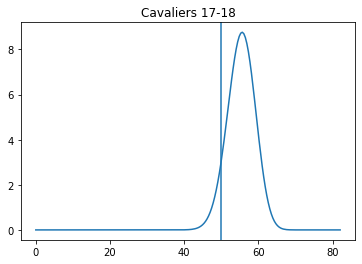

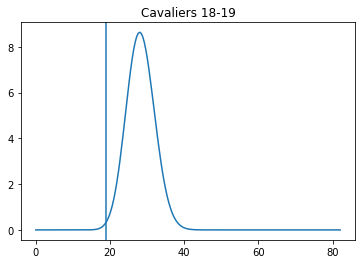

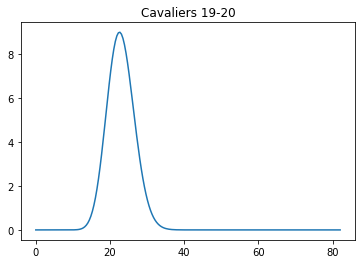

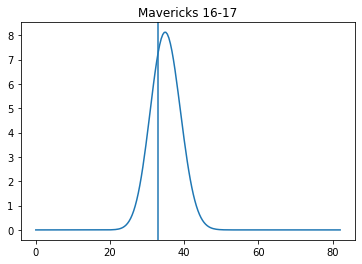

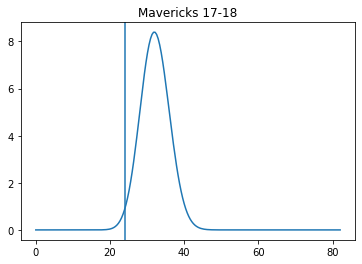

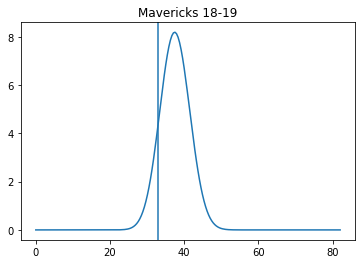

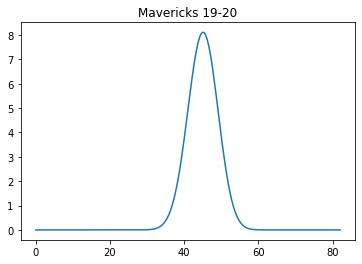

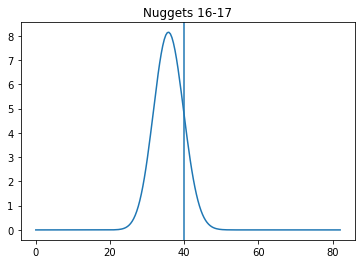

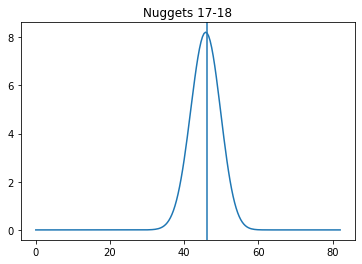

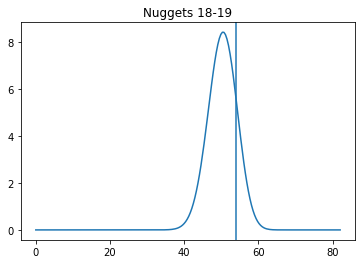

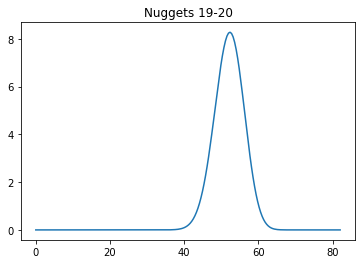

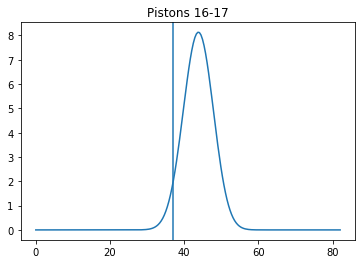

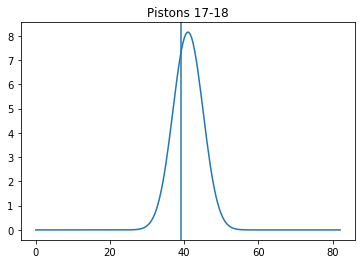

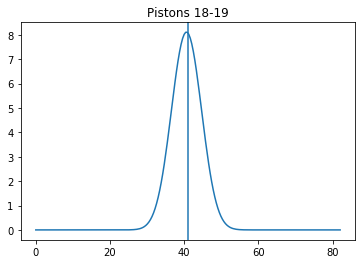

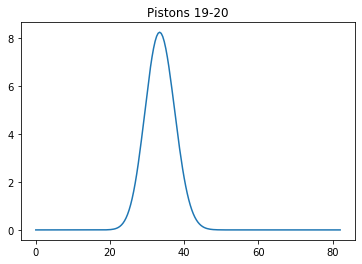

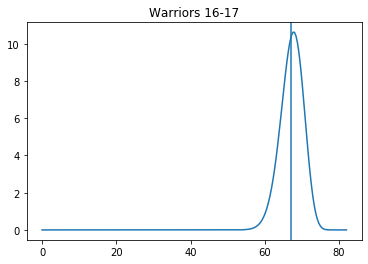

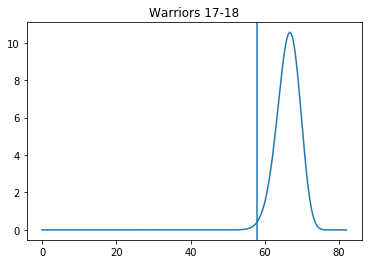

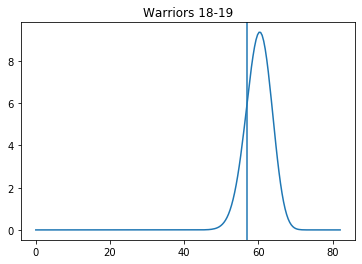

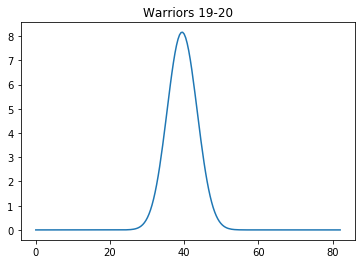

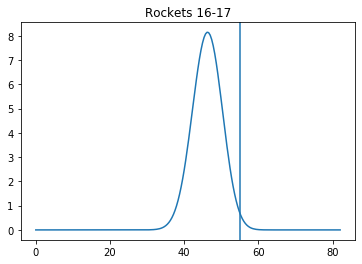

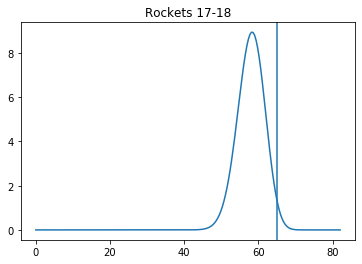

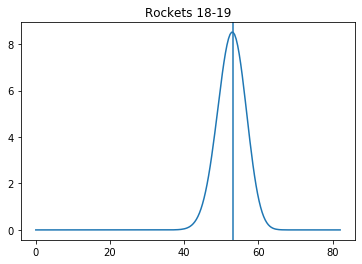

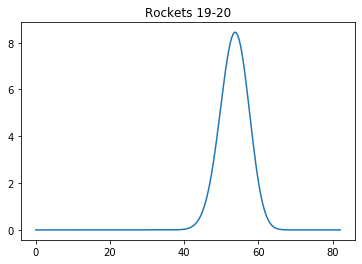

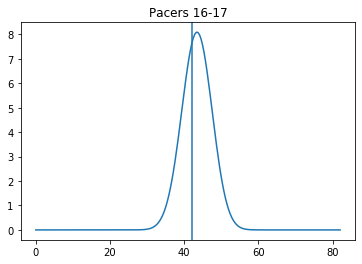

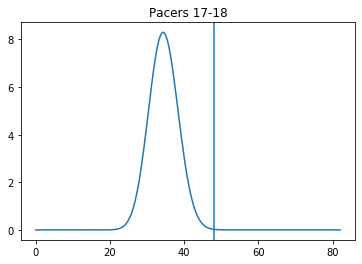

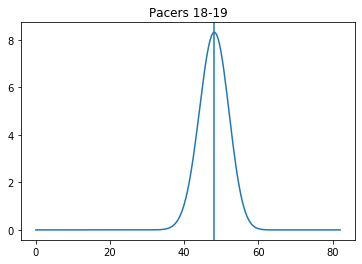

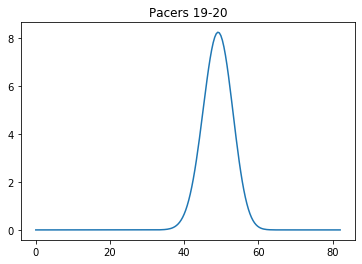

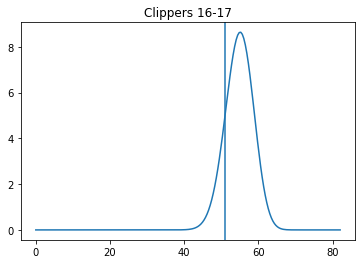

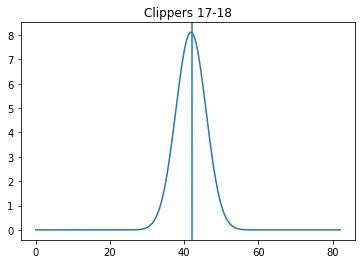

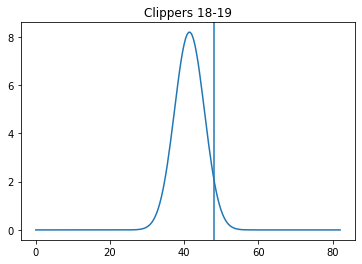

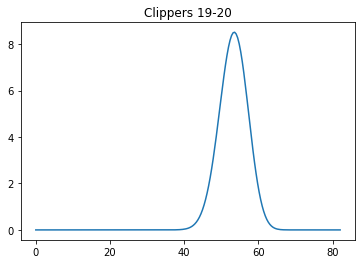

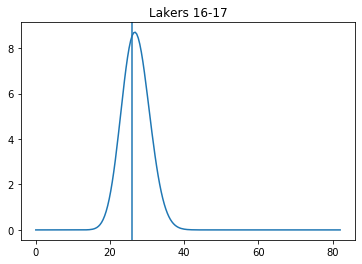

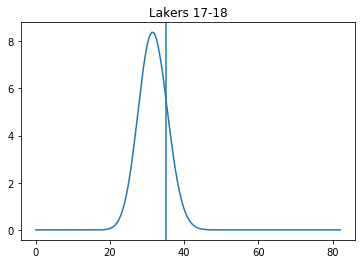

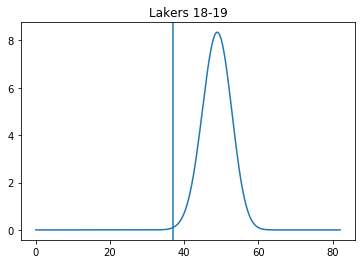

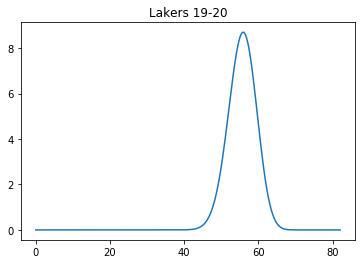

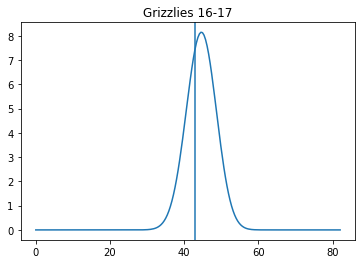

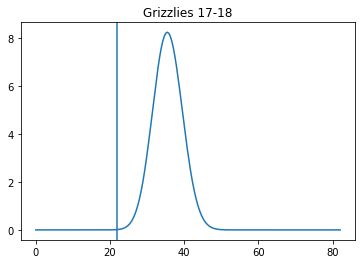

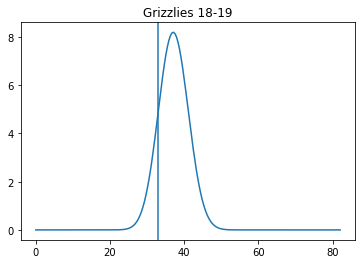

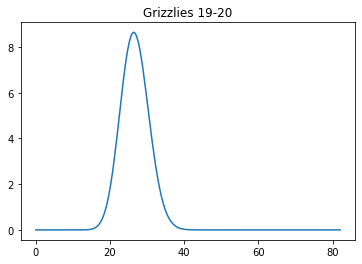

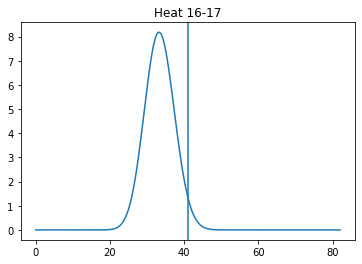

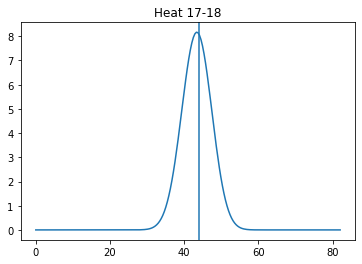

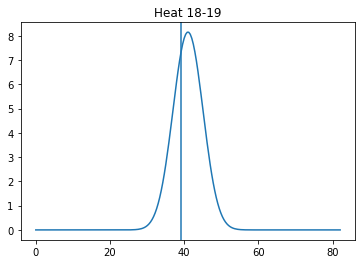

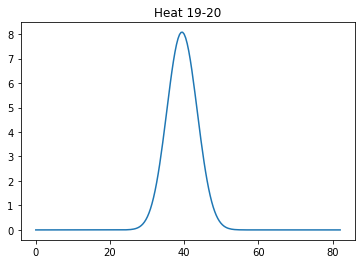

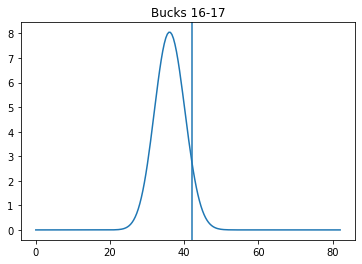

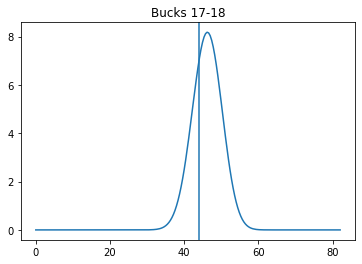

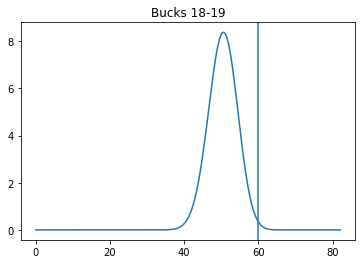

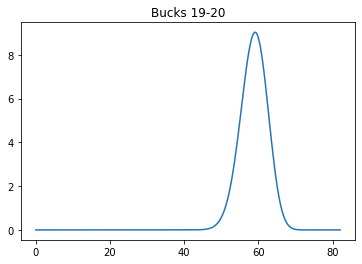

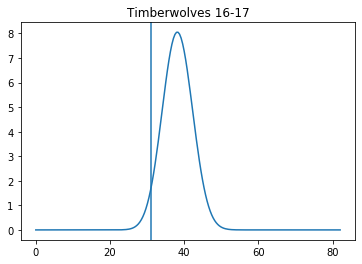

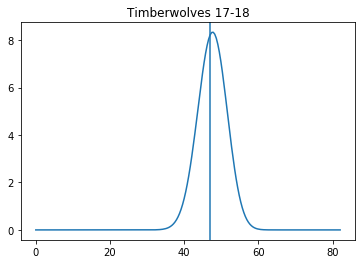

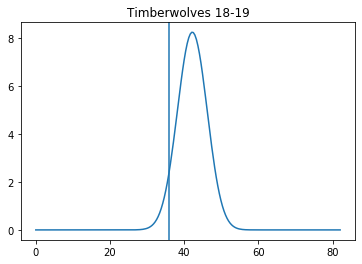

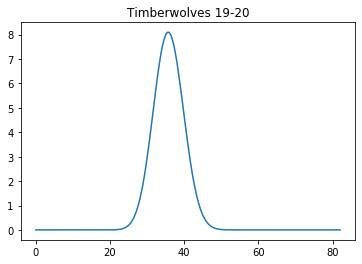

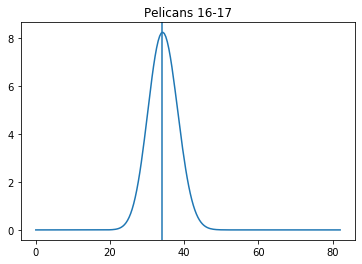

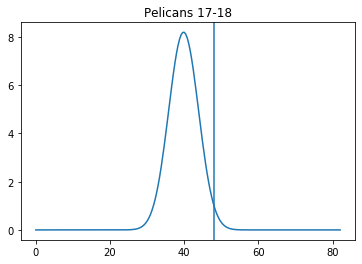

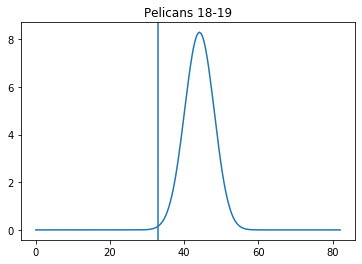

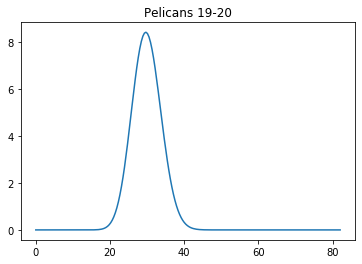

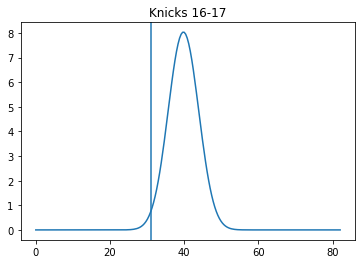

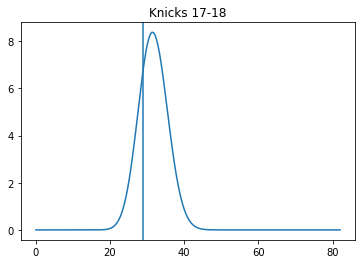

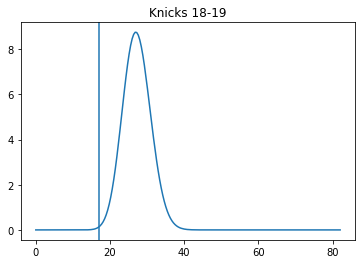

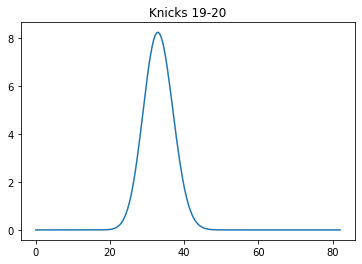

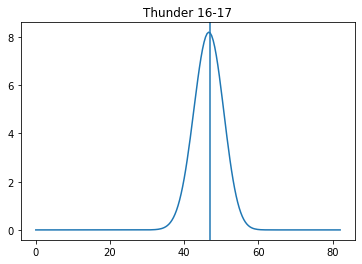

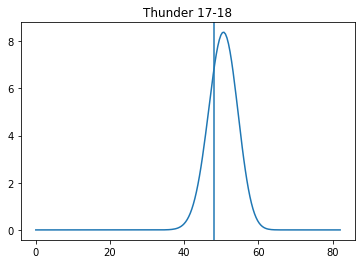

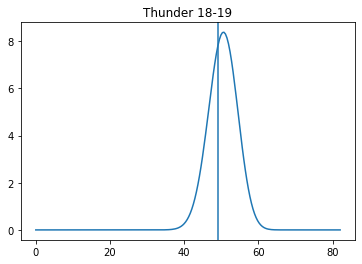

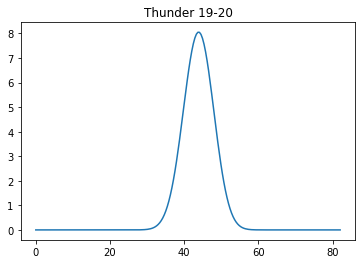

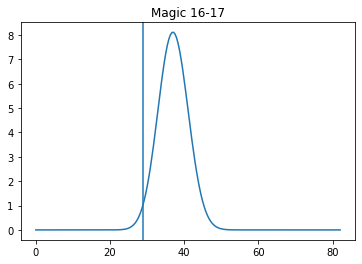

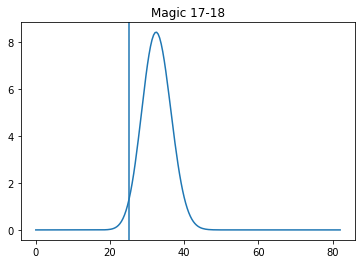

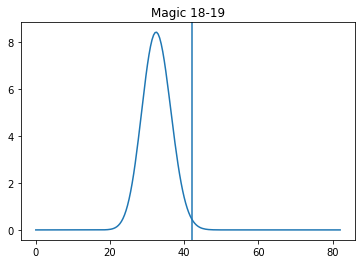

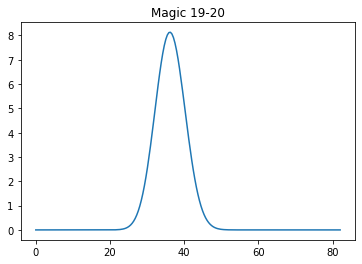

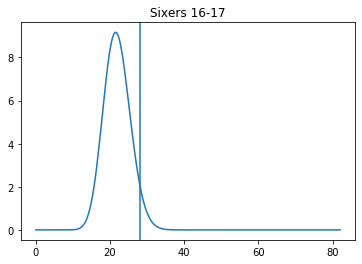

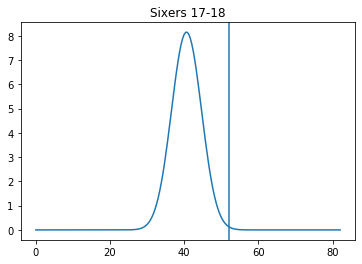

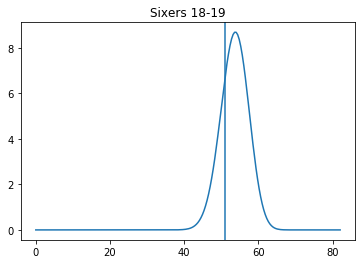

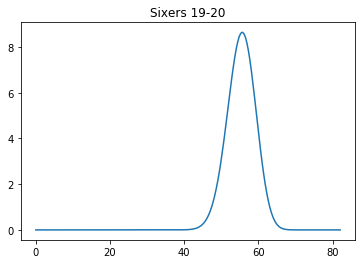

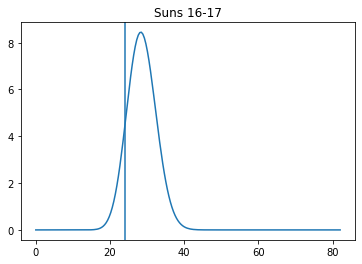

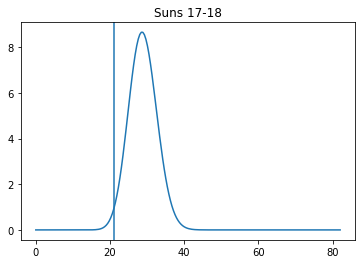

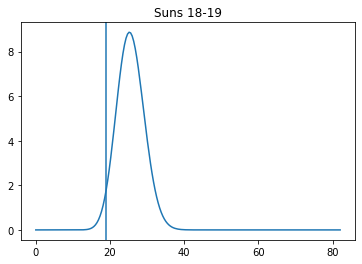

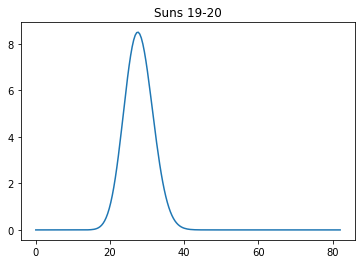

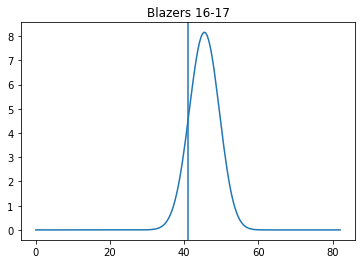

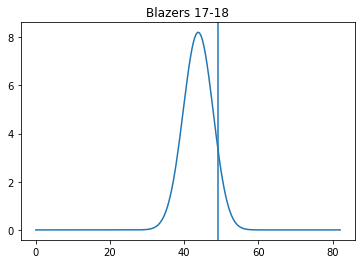

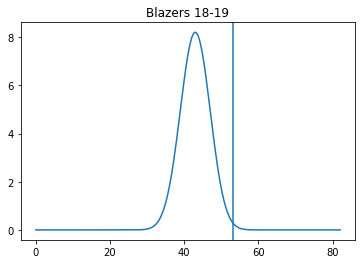

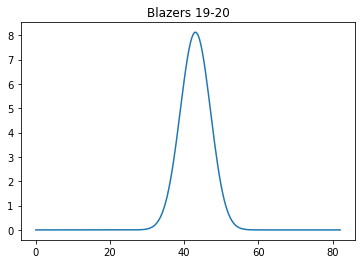

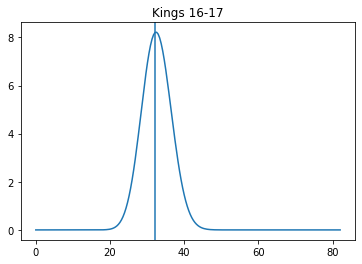

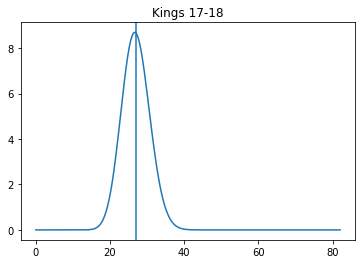

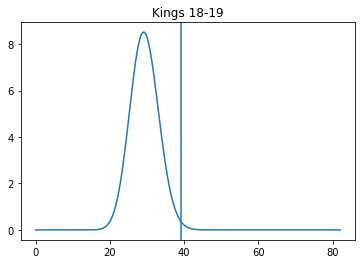

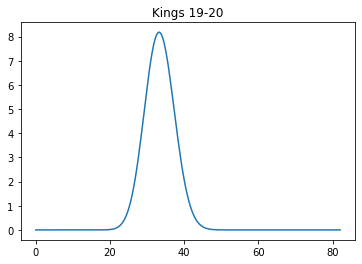

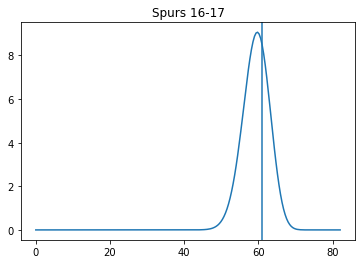

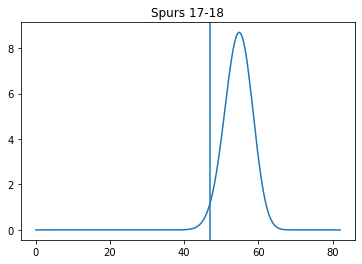

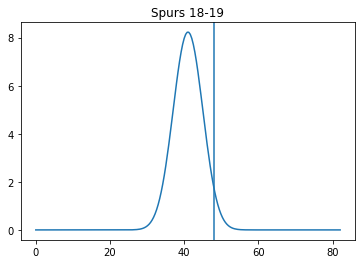

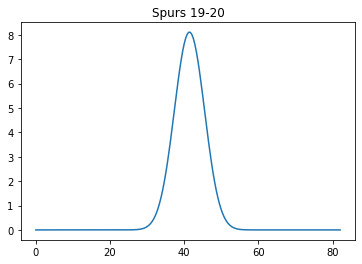

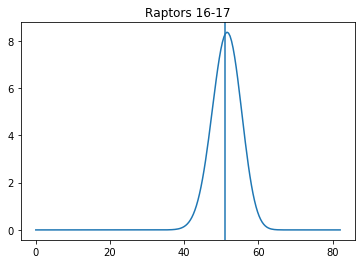

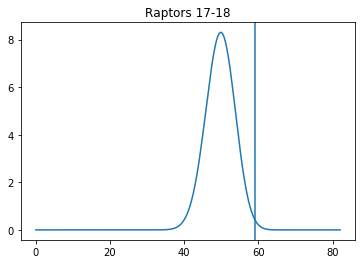

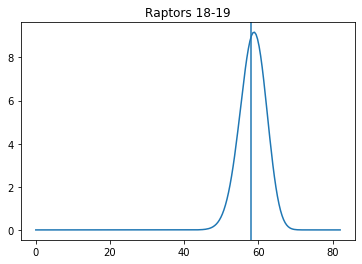

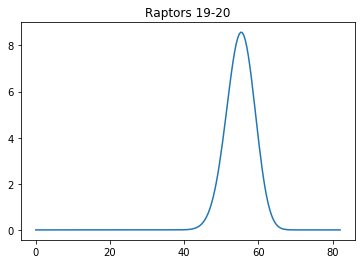

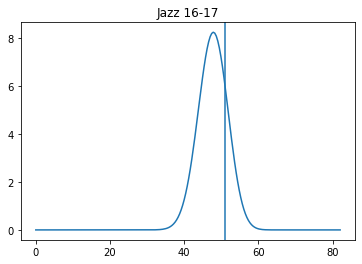

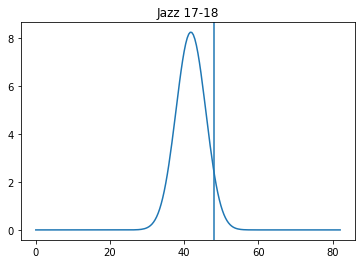

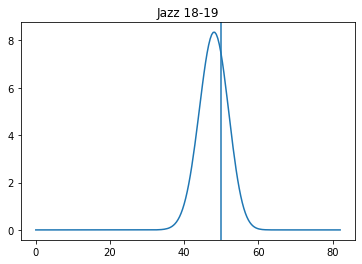

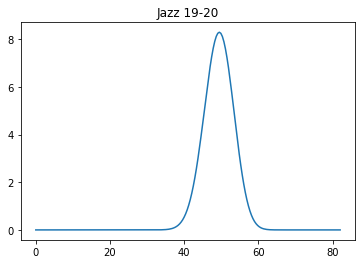

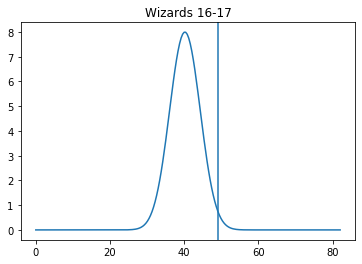

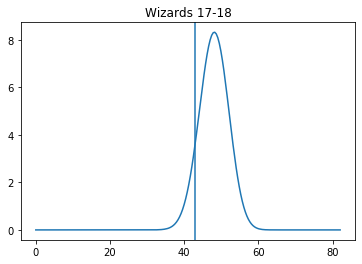

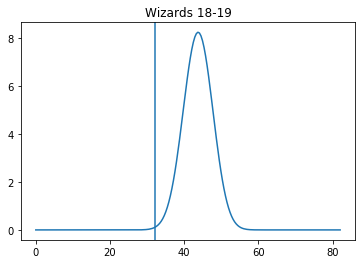

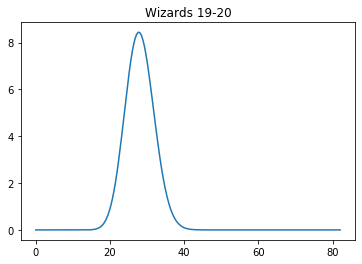

In [39]:
factor = 1
maps = []
for i in range(len(dat_clean['Proj'])):
    x = np.linspace(0,1,200)
    y = stats.beta(a[i]*factor + yy[i], b[i]*factor + n[i] - yy[i]).pdf(x)
    maps.append(np.argmax(y))

    plt.plot(x *82, y)
    plt.title(str(dat_clean["Team"][i]) + " " +str(dat_clean["Year"][i]))
    plt.axvline(x=dat_clean["Final"][i])
    plt.show()

In [40]:
maps = np.asarray(maps)
exes = (maps / 200) * 82
test = np.delete(exes, np.arange(3, exes.size, 4))
dat_final = dat_clean["Final"][np.logical_not(np.isnan(dat_clean["Final"]))]

diffs_final = np.abs(dat_final - test)
print(np.mean(diffs_final))
print(np.median(diffs_final))
print(test[0])

4.970777777777778
4.32
41.82


(array([0.17535469, 0.09564802, 0.06376534, 0.06376534, 0.05579468,
        0.11956002, 0.07173601, 0.023912  , 0.03188267, 0.01594134]),
 array([ 0.03 ,  1.424,  2.818,  4.212,  5.606,  7.   ,  8.394,  9.788,
        11.182, 12.576, 13.97 ]),
 <a list of 10 Patch objects>)

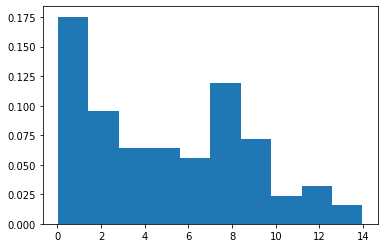

In [41]:
plt.hist(diffs_final, density = True)

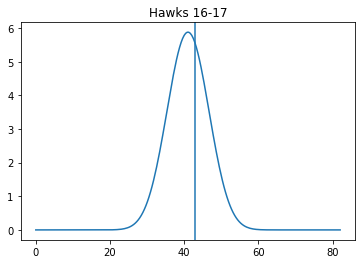

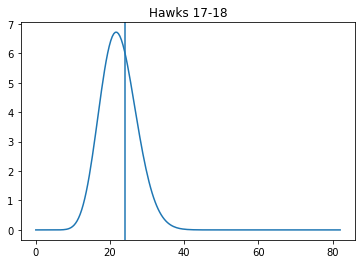

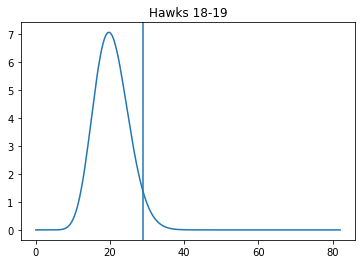

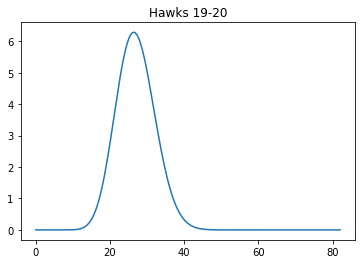

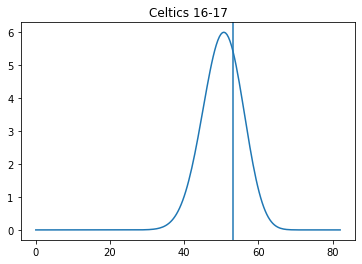

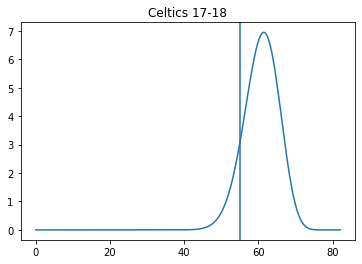

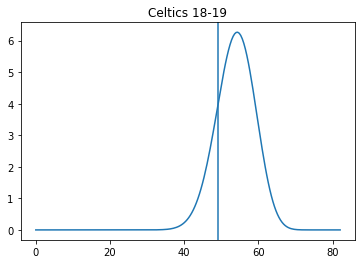

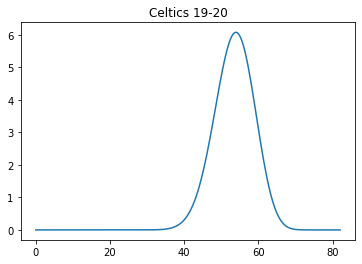

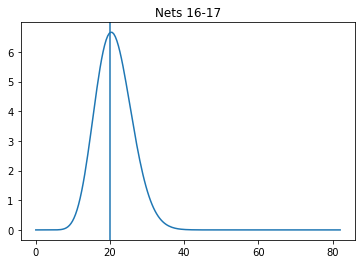

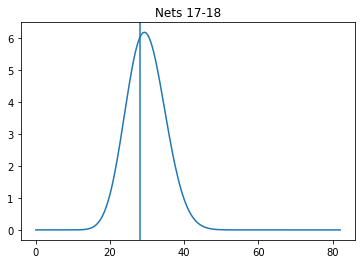

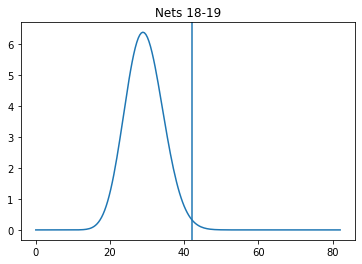

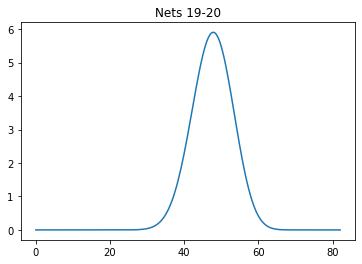

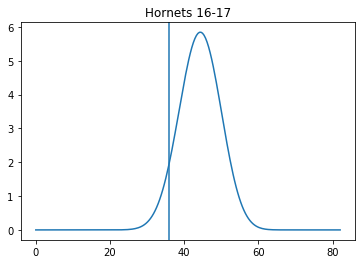

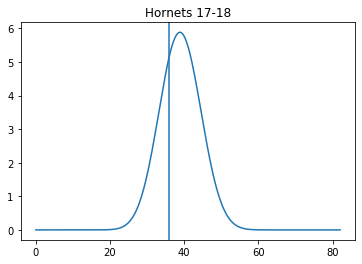

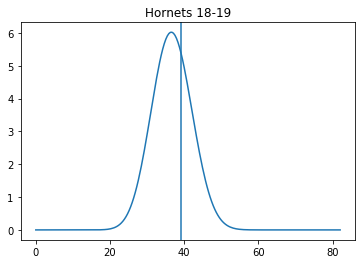

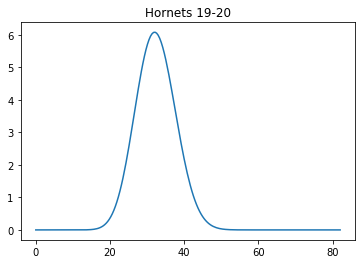

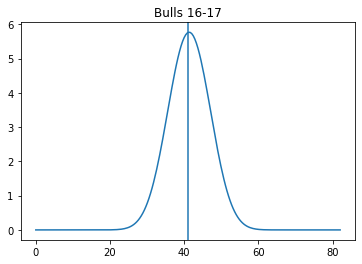

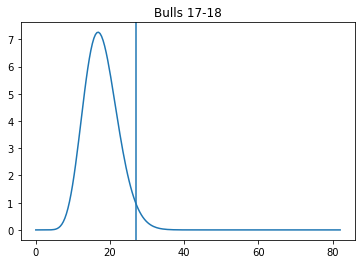

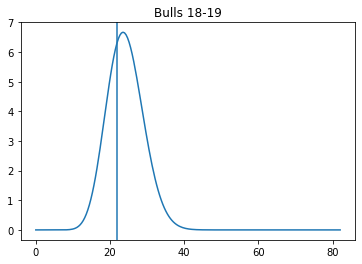

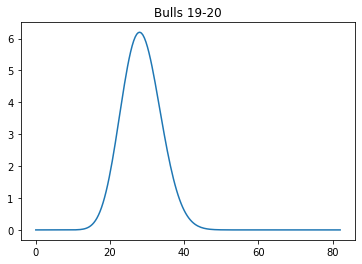

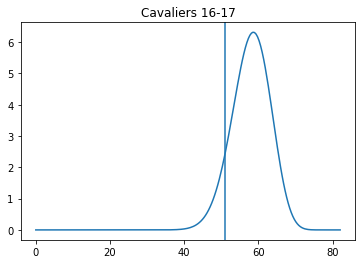

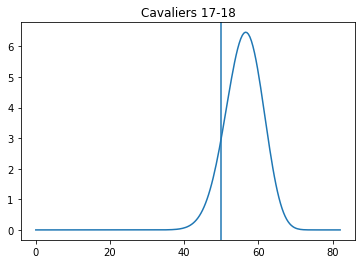

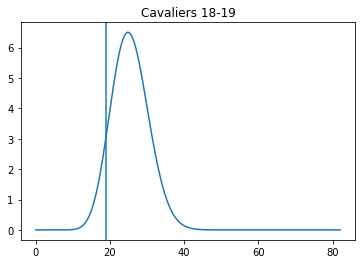

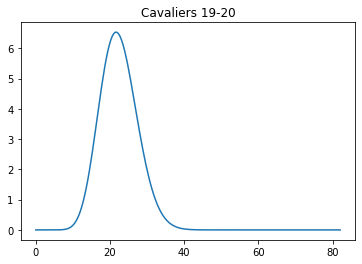

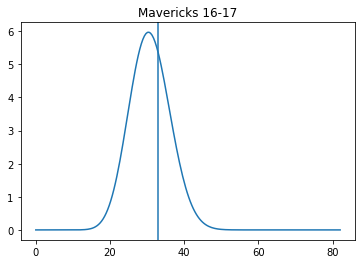

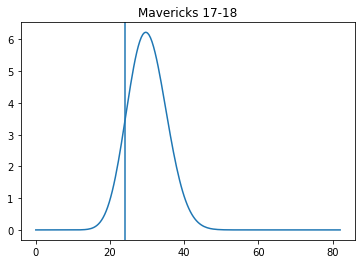

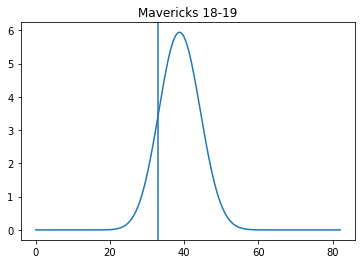

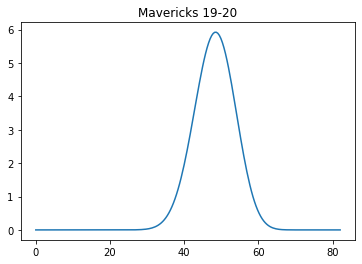

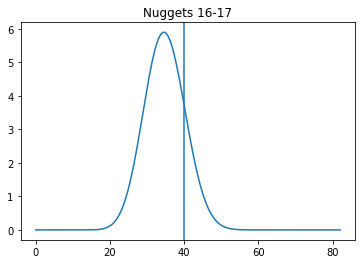

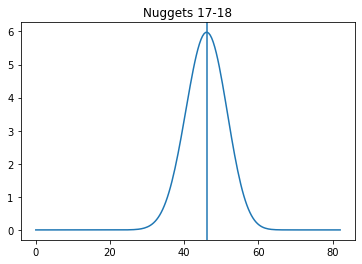

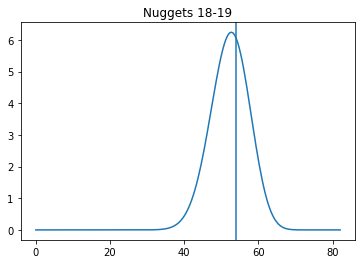

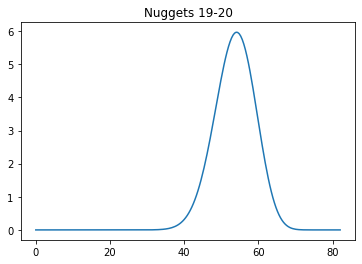

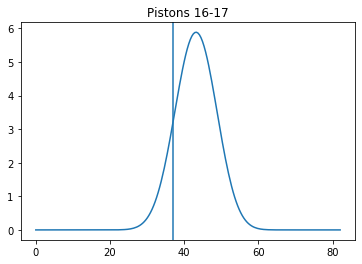

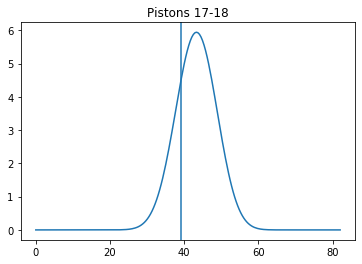

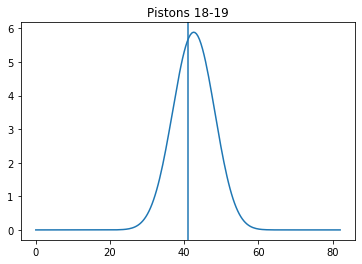

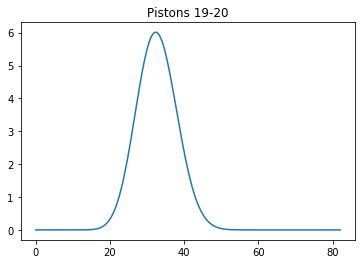

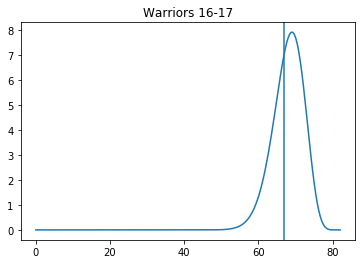

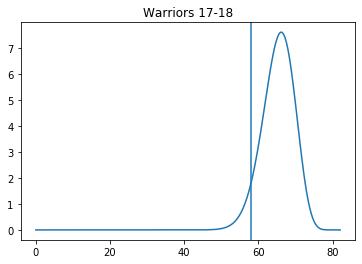

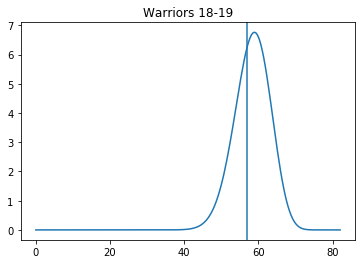

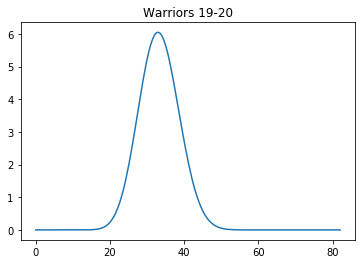

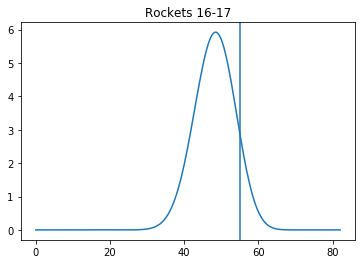

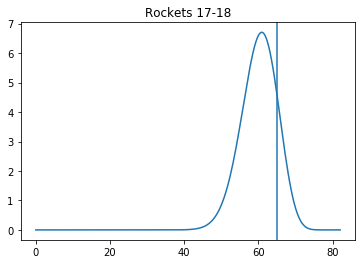

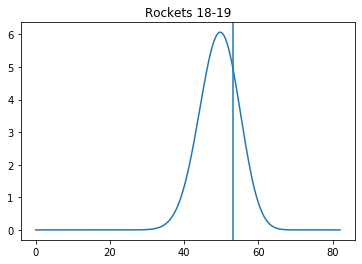

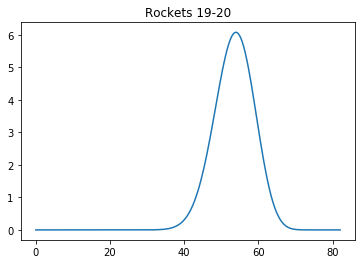

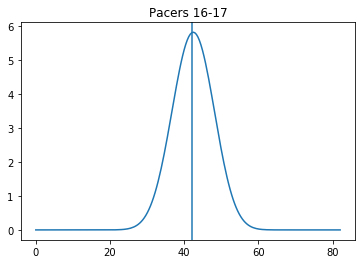

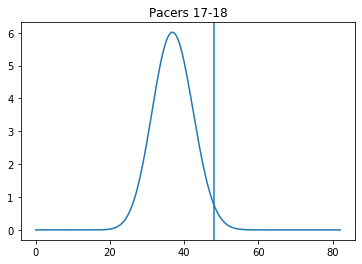

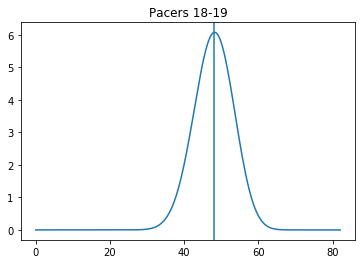

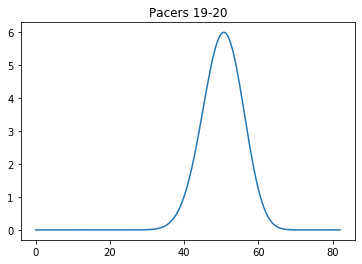

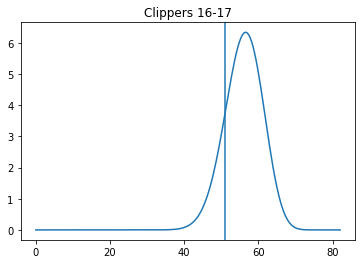

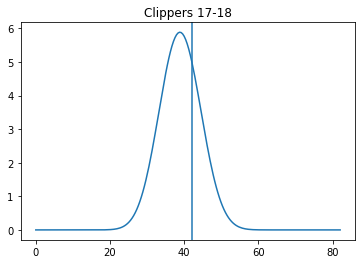

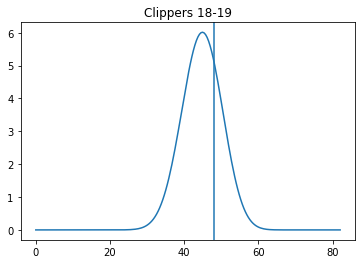

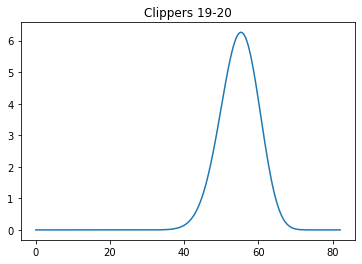

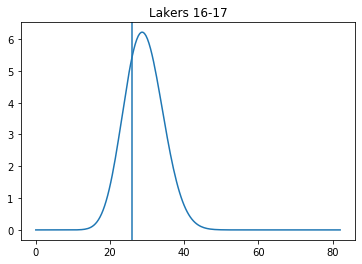

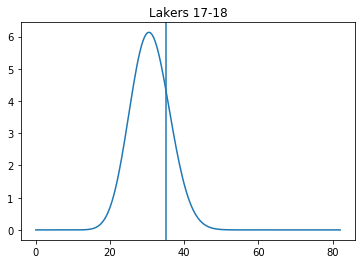

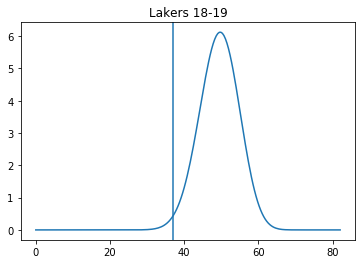

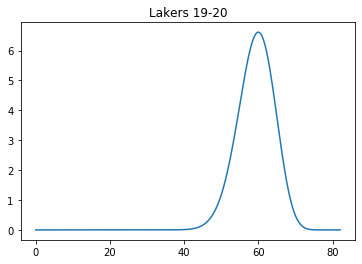

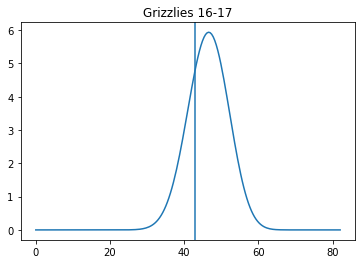

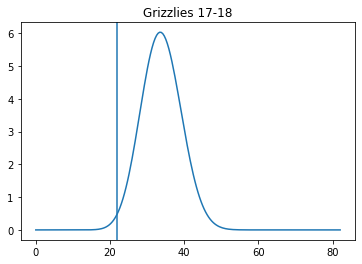

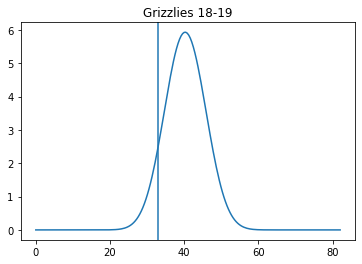

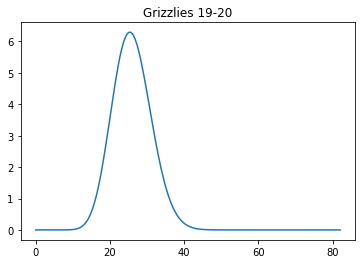

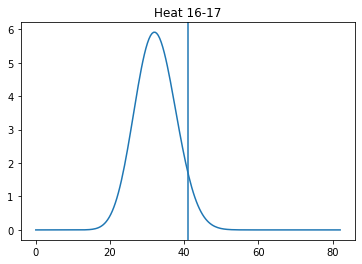

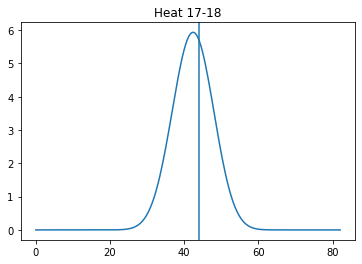

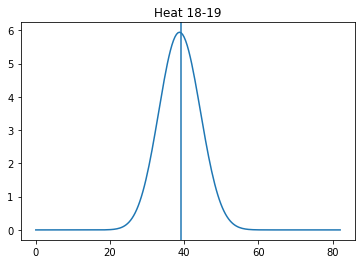

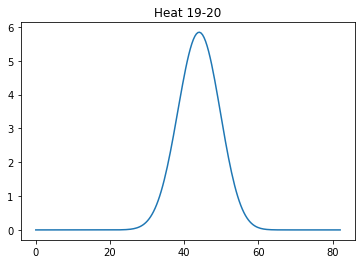

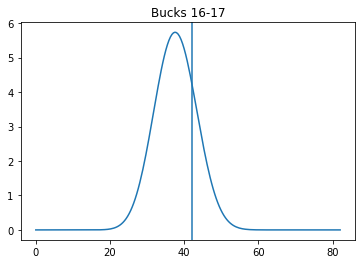

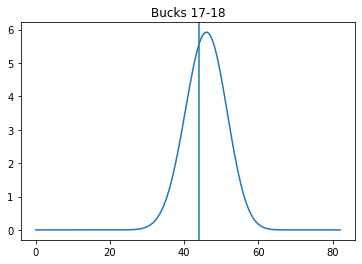

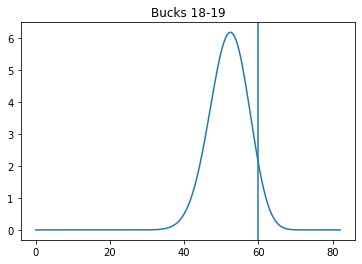

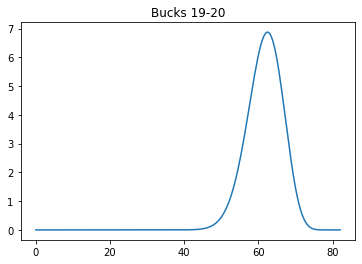

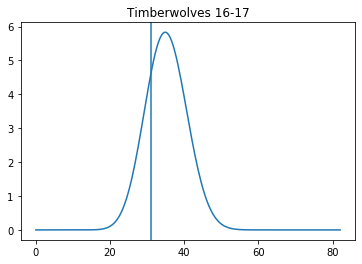

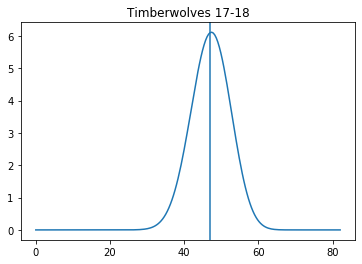

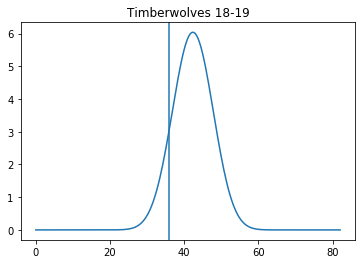

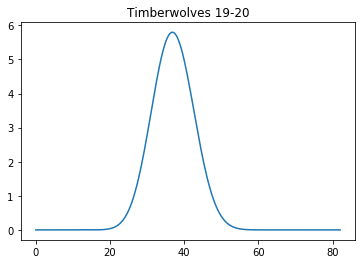

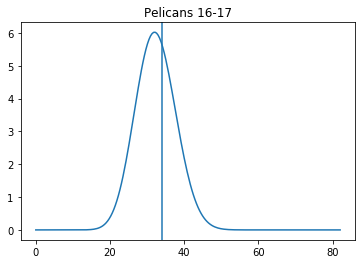

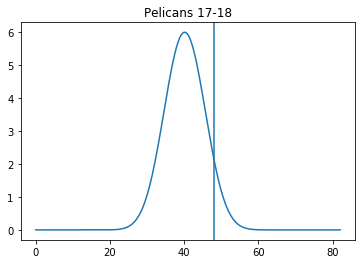

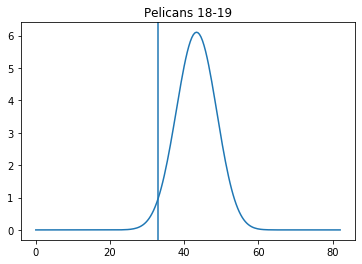

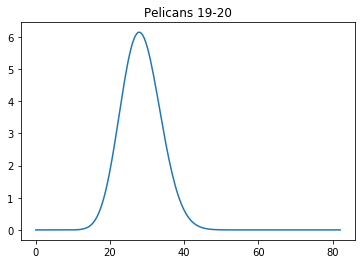

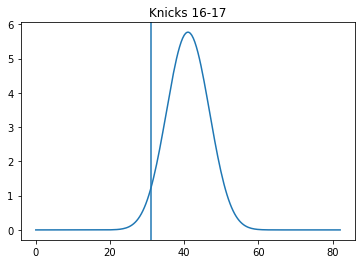

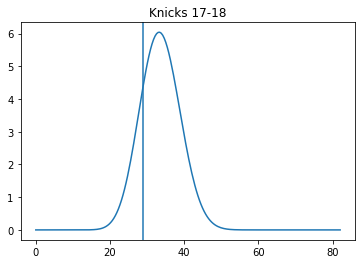

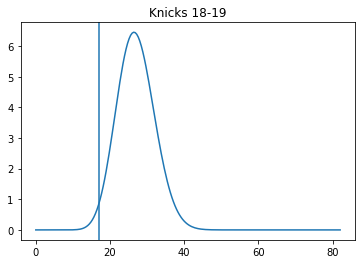

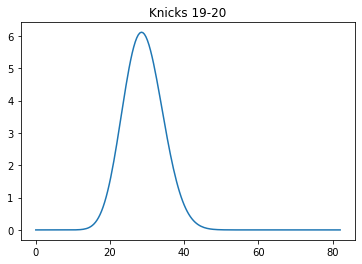

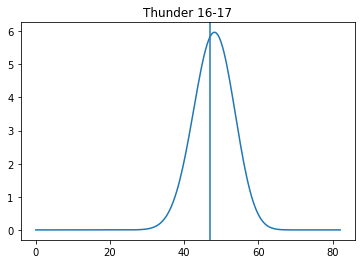

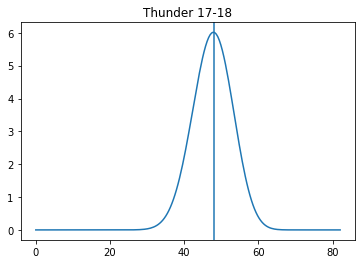

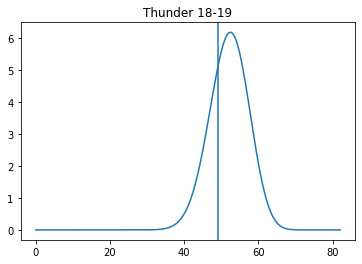

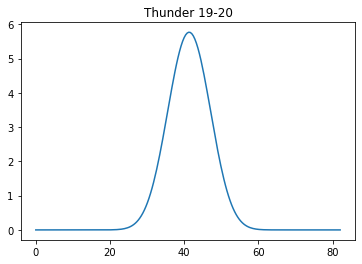

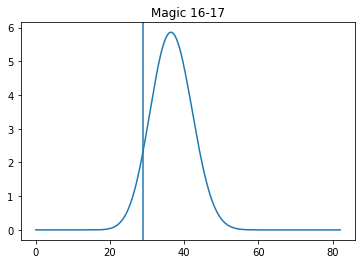

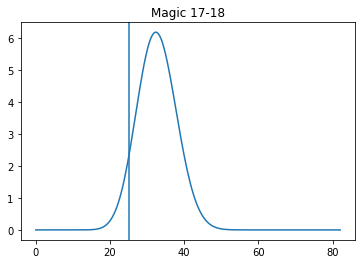

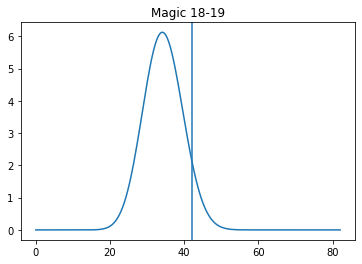

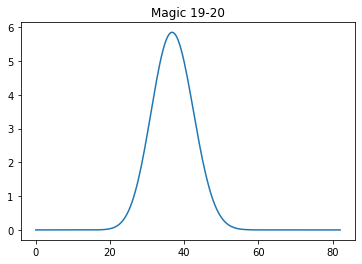

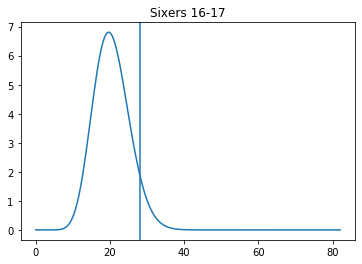

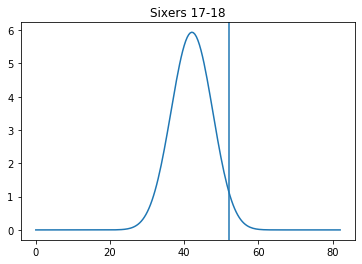

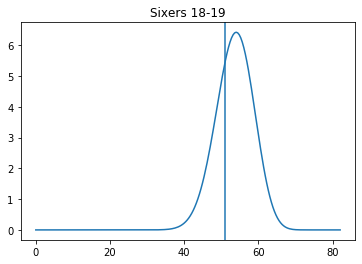

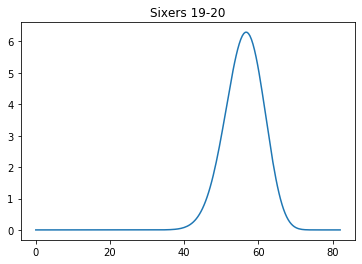

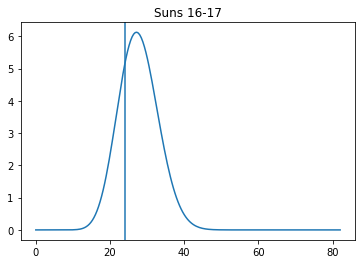

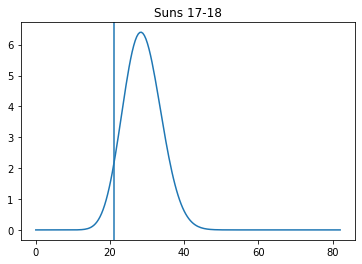

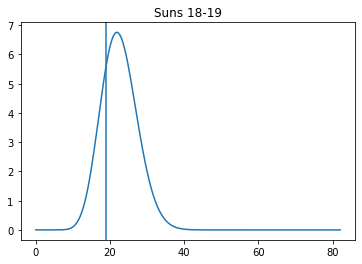

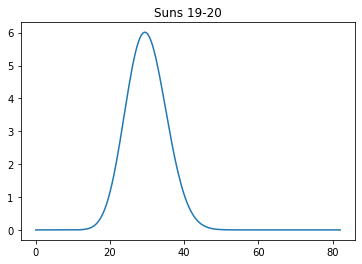

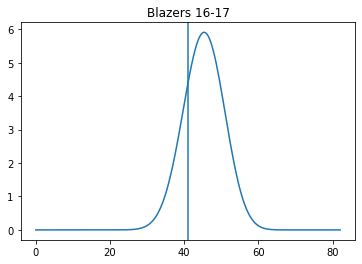

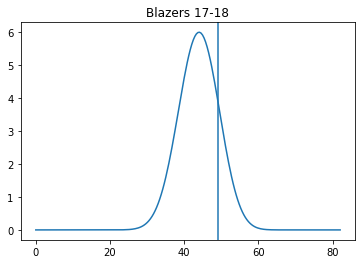

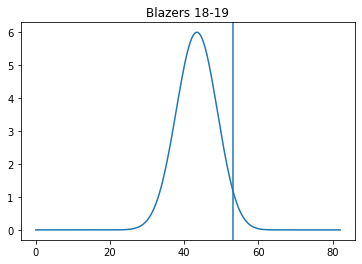

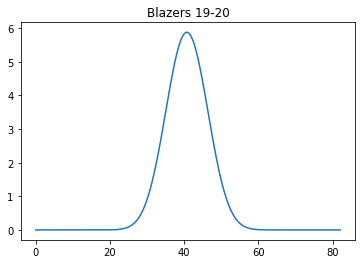

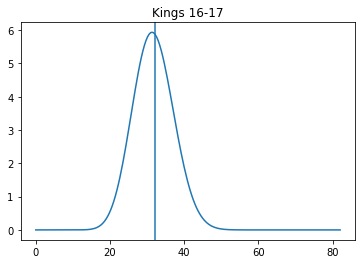

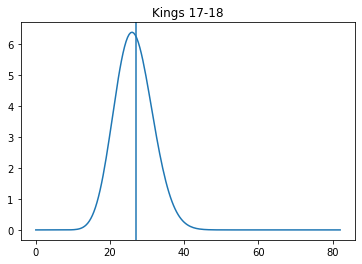

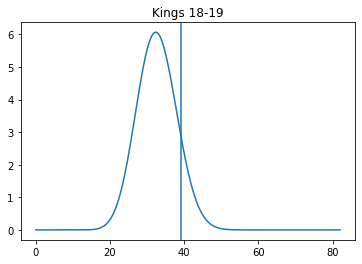

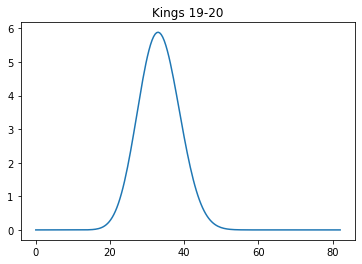

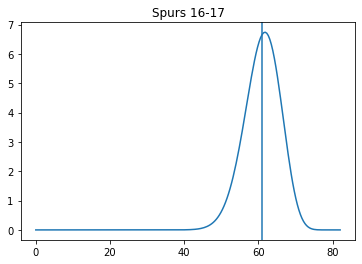

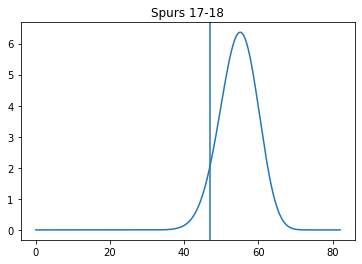

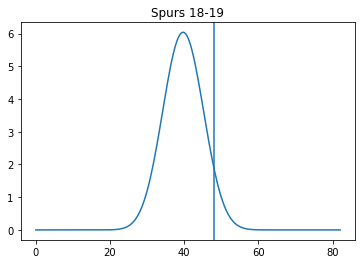

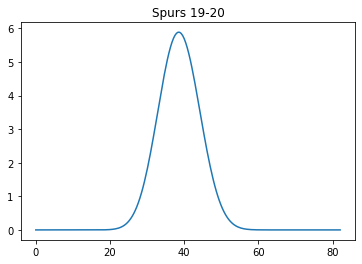

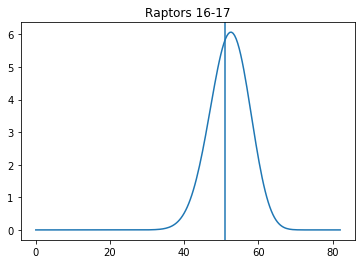

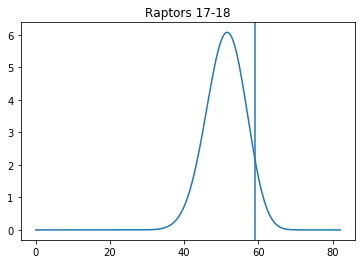

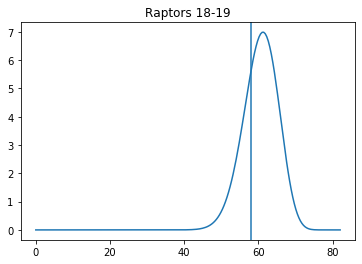

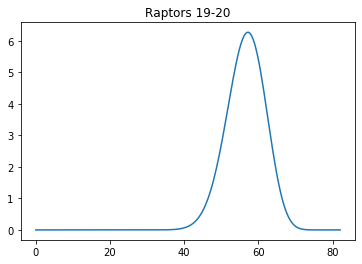

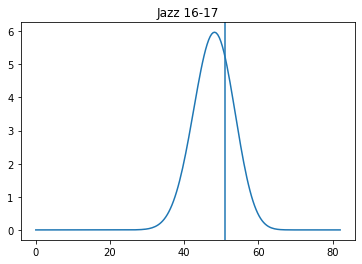

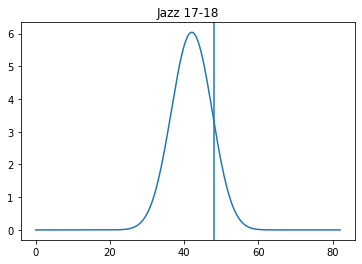

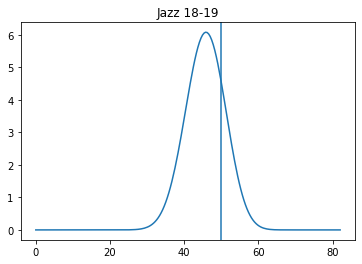

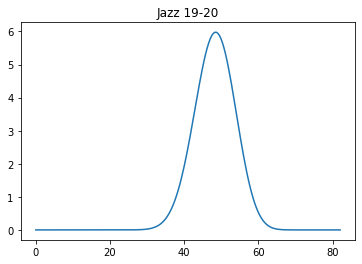

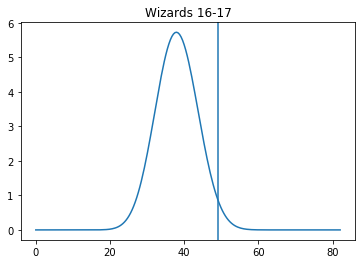

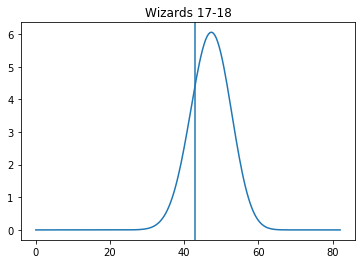

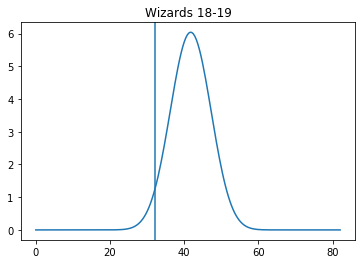

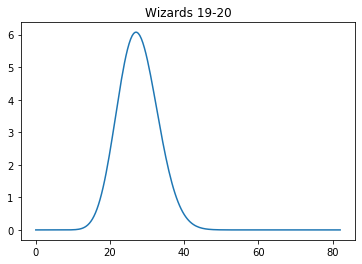

In [42]:
factor = 0.4
maps = []
l_bound = []
u_bound = []
for i in range(len(dat_clean['Proj'])):
    x = np.linspace(0,1,200)
    y = stats.beta(a[i]*factor + yy[i], b[i]*factor + n[i] - yy[i]).pdf(x)
    maps.append(np.argmax(y))
    l_bound.append(beta.ppf(0.05, a[i]*factor + yy[i], b[i]*factor + n[i] - yy[i]) * 82)
    u_bound.append(beta.ppf(0.95, a[i]*factor + yy[i], b[i]*factor + n[i] - yy[i]) * 82)

    plt.plot(x *82, y)
    plt.title(str(dat_clean["Team"][i]) + " " +str(dat_clean["Year"][i]))
    plt.axvline(x=dat_clean["Final"][i])
    plt.show()

In [43]:
dat_final = dat_clean["Final"][np.logical_not(np.isnan(dat_clean["Final"]))]
dat_final = np.asarray(dat_final)
l_bound = np.asarray(l_bound)
u_bound = np.asarray(u_bound)
l_bound1 = np.delete(l_bound, np.arange(3, l_bound.size, 4))
u_bound1 = np.delete(u_bound, np.arange(3, u_bound.size, 4))

l_bound1
u_bound1

count = 0
for j in range(len(test)):
    if(dat_final[j] > l_bound1[j]) & (test[j] < u_bound1[j]):
        count = count + 1

print(count / len(test))
print(l_bound1[0])
print(u_bound1[0])

0.9333333333333333
31.961282412697688
50.0387175873023


In [44]:
u_bound1[0]

50.0387175873023

In [45]:
#80 percent of predictions contained in 90% credible interval for factor of 1
#93.3% for factor of 0.4

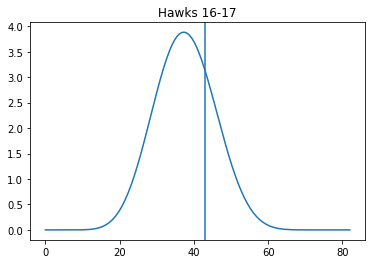

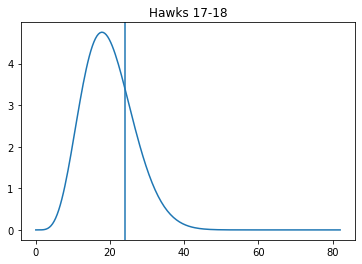

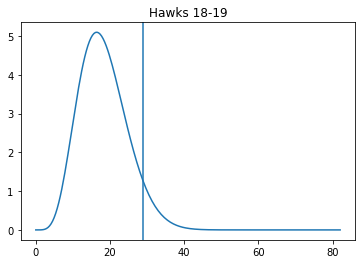

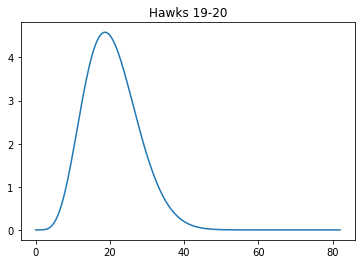

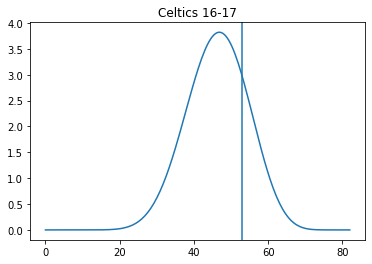

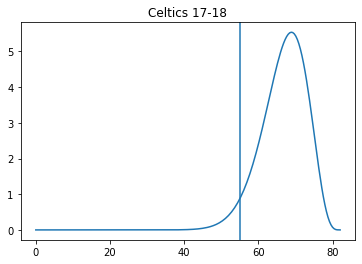

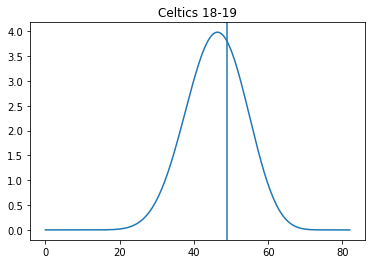

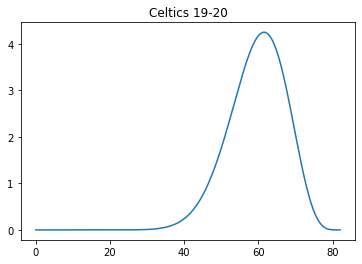

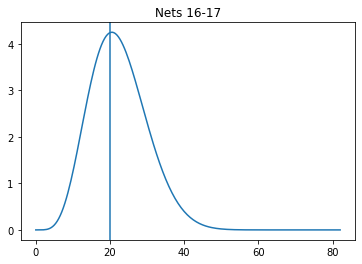

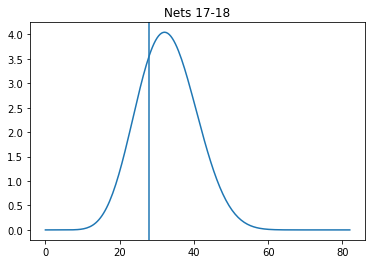

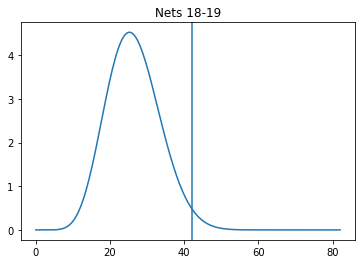

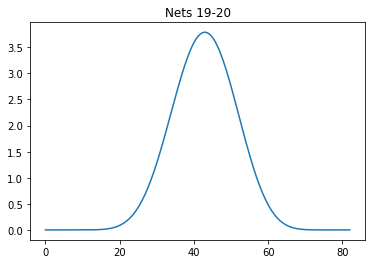

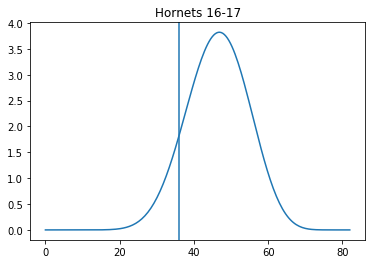

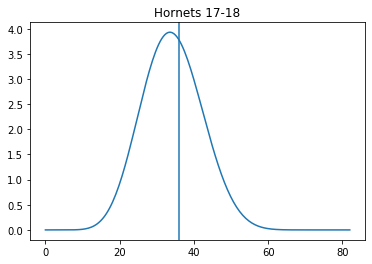

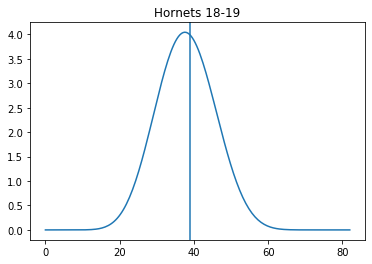

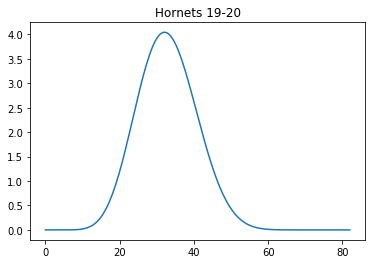

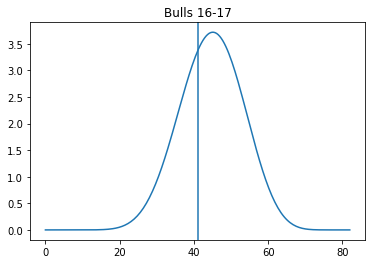

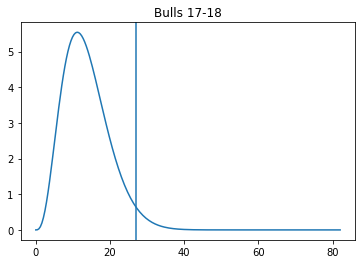

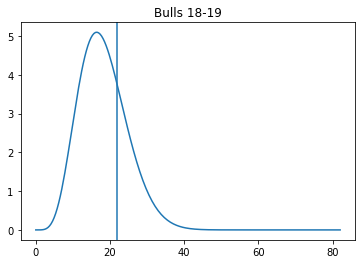

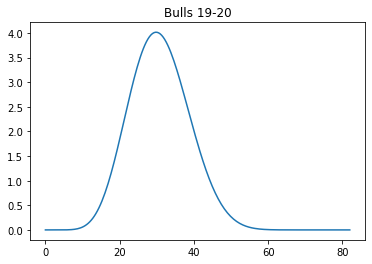

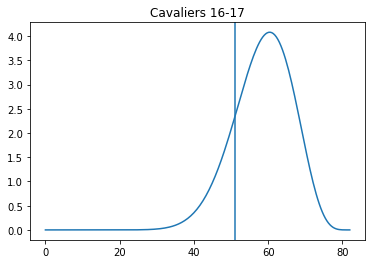

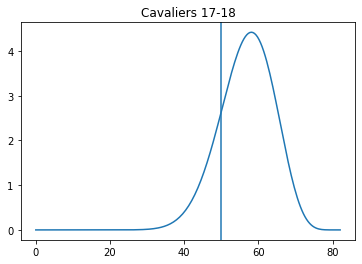

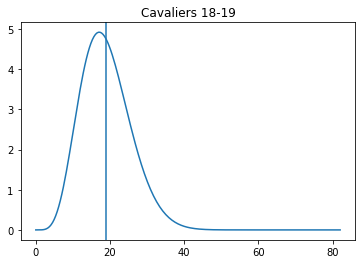

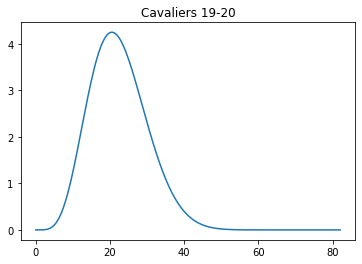

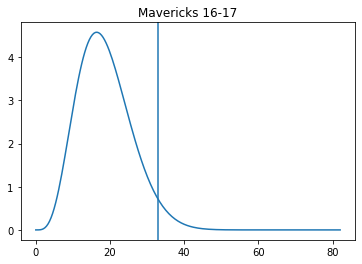

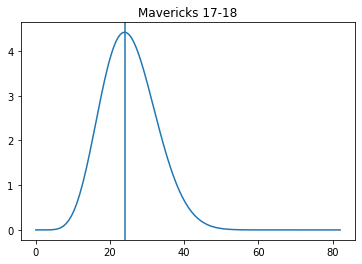

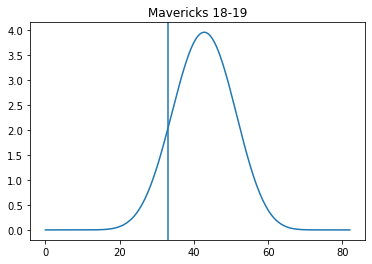

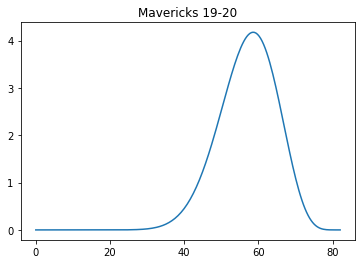

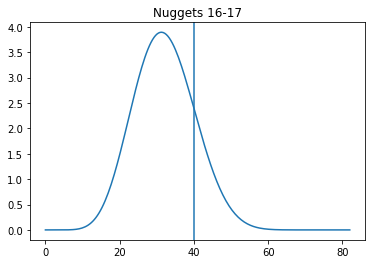

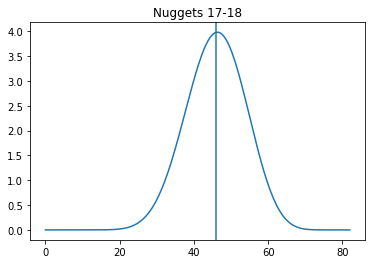

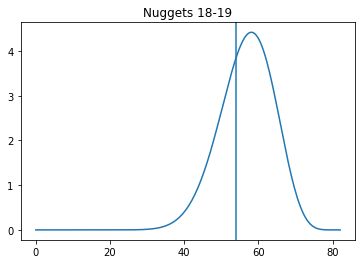

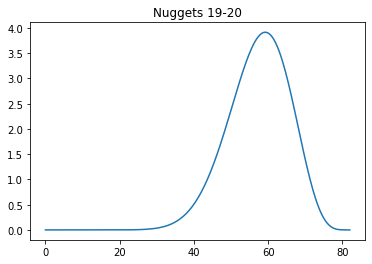

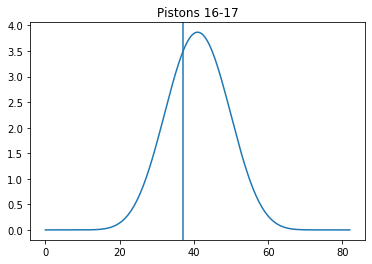

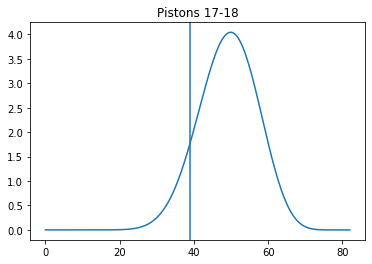

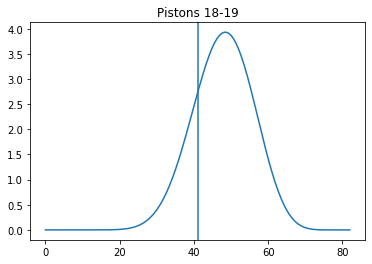

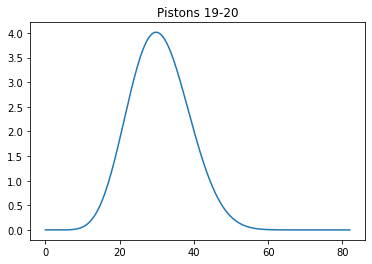

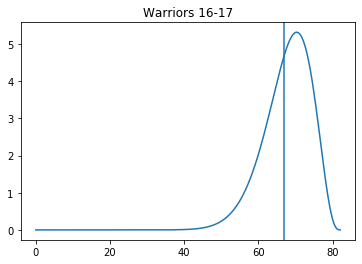

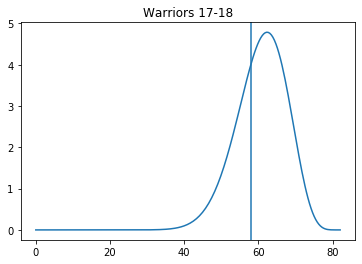

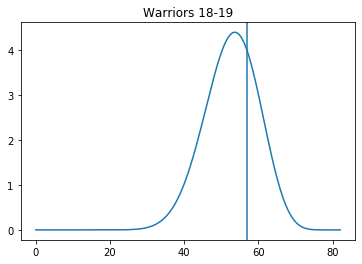

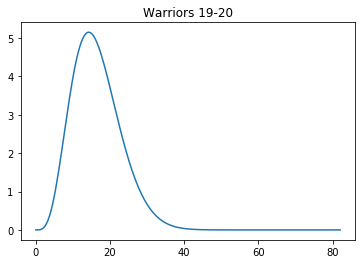

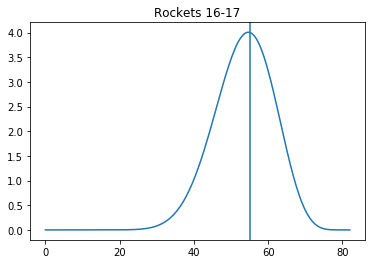

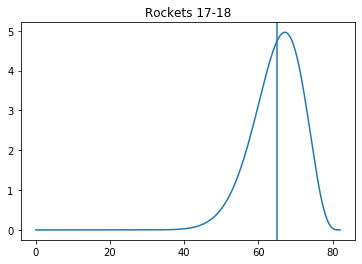

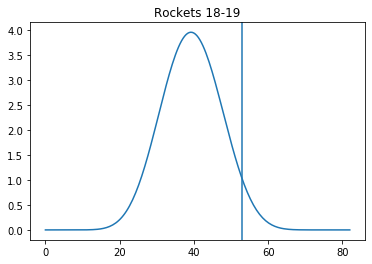

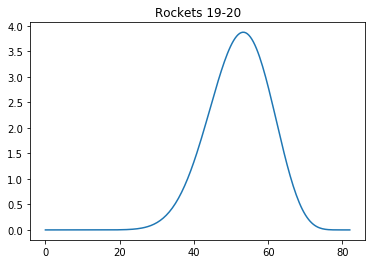

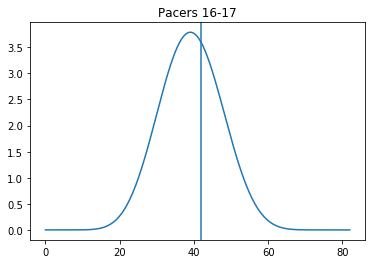

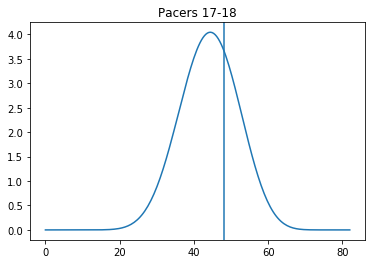

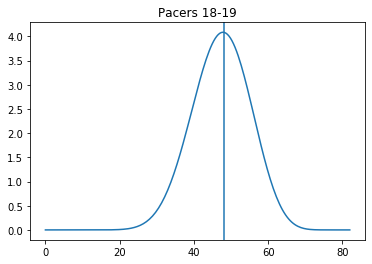

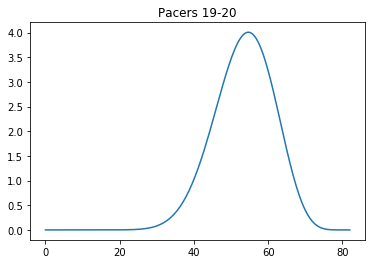

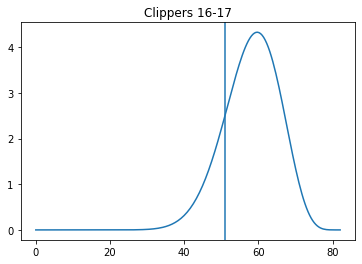

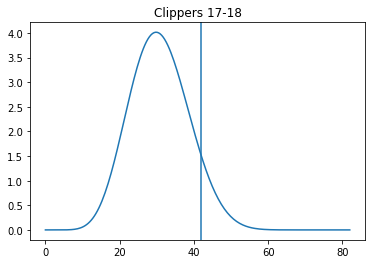

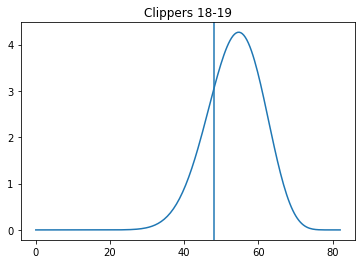

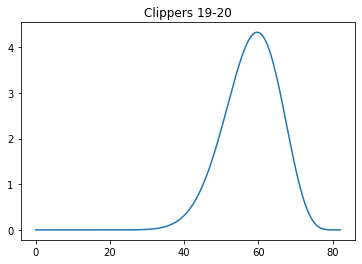

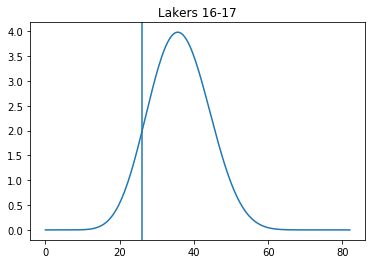

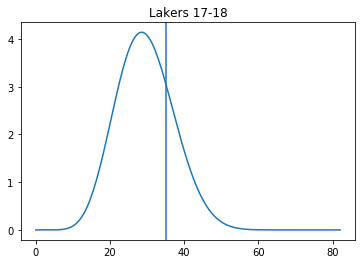

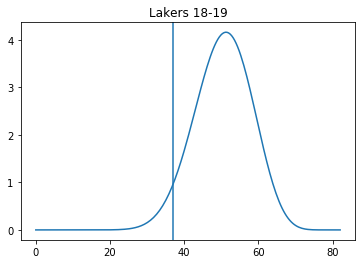

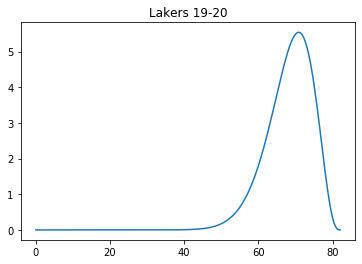

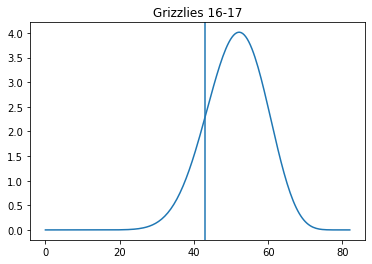

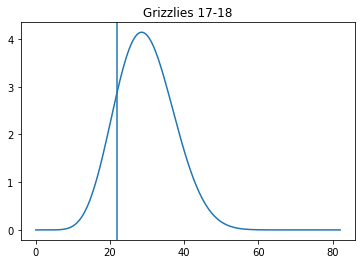

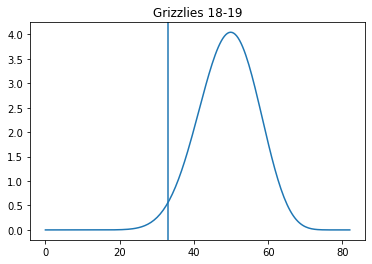

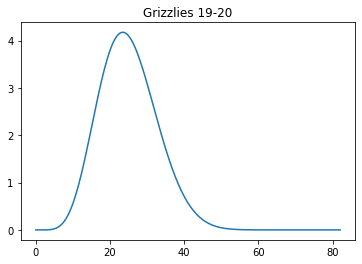

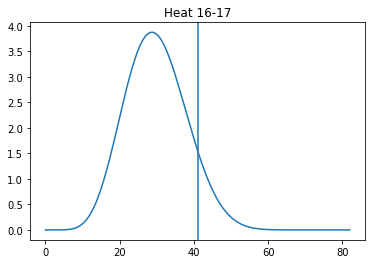

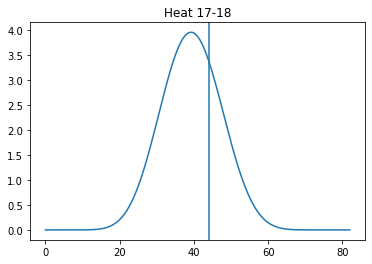

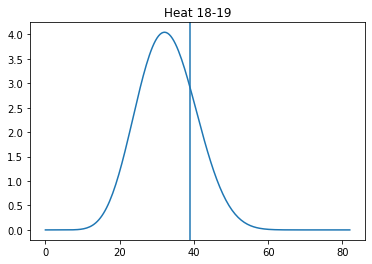

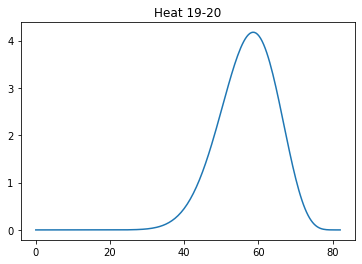

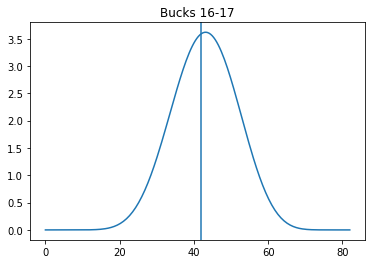

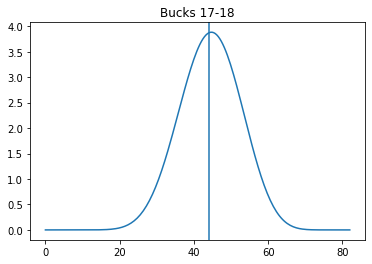

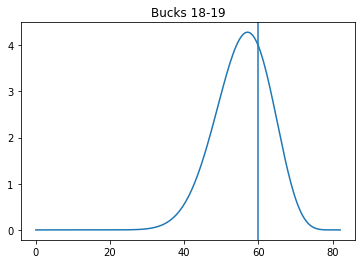

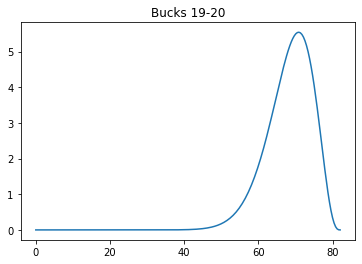

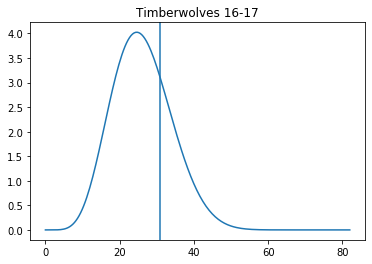

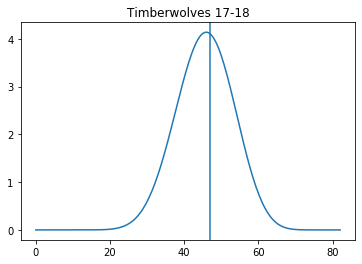

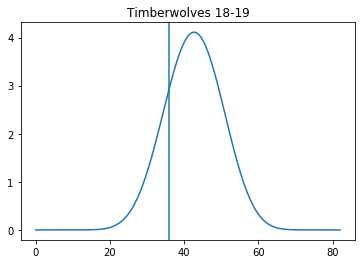

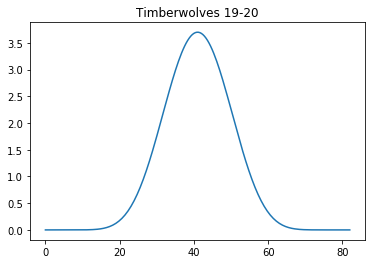

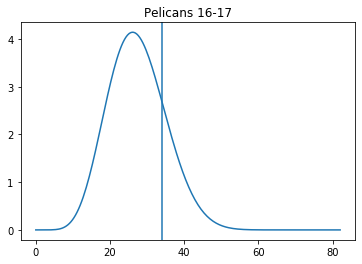

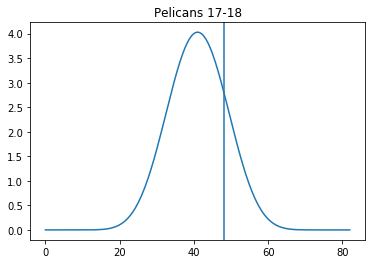

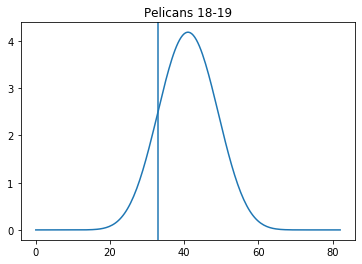

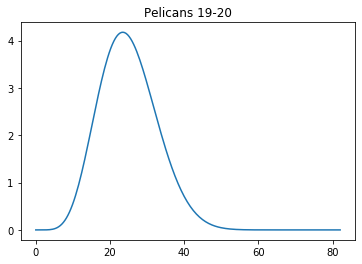

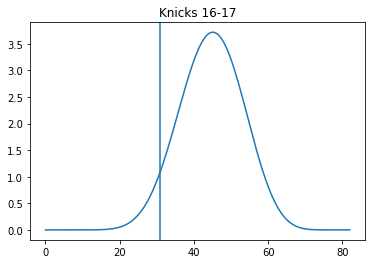

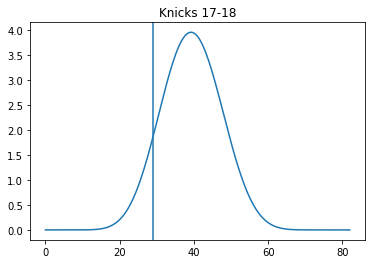

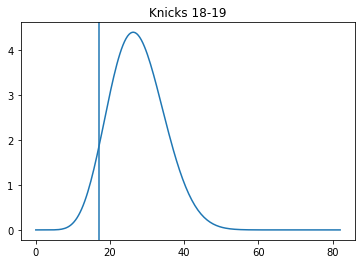

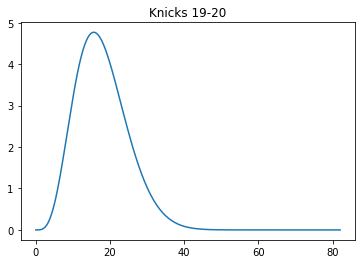

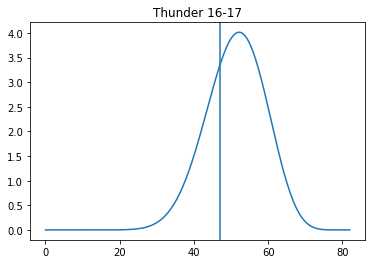

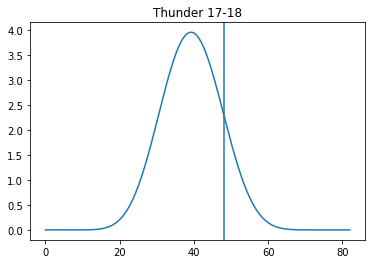

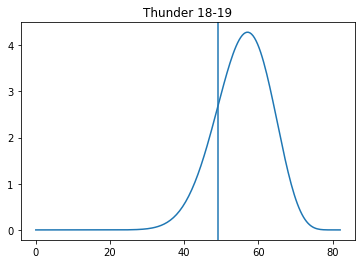

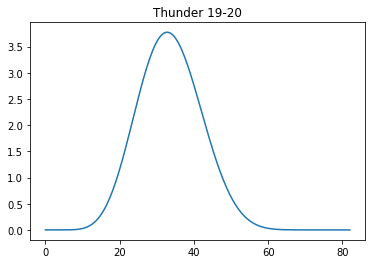

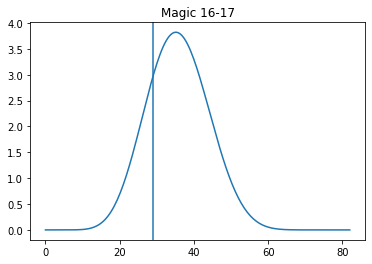

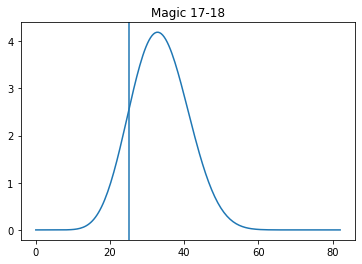

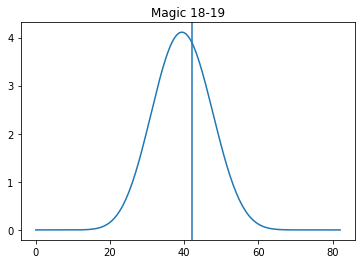

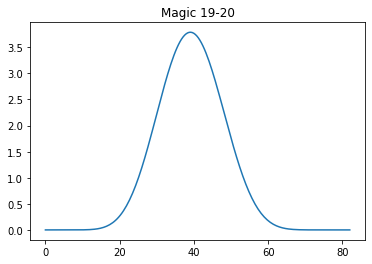

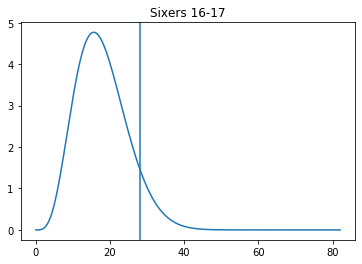

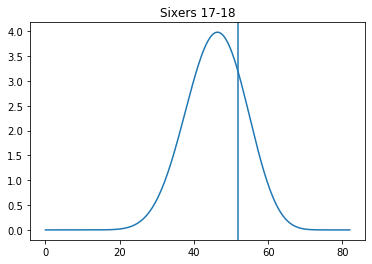

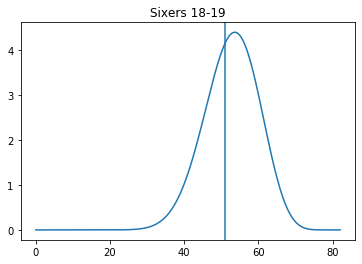

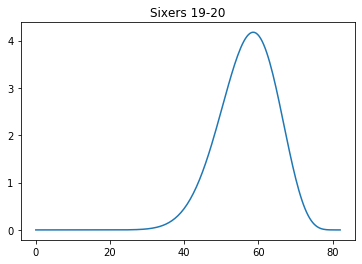

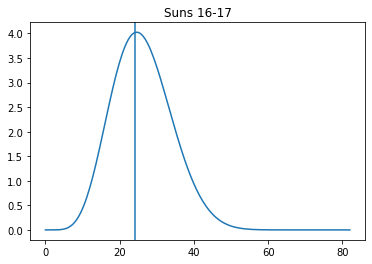

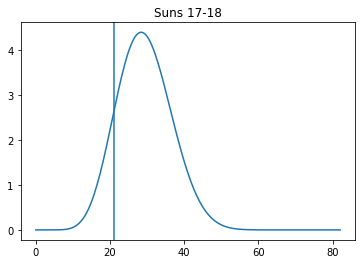

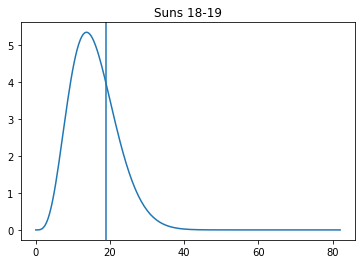

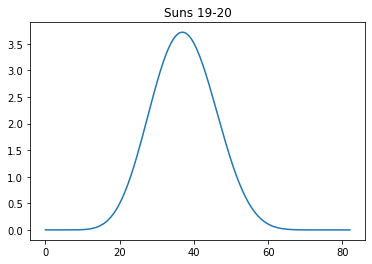

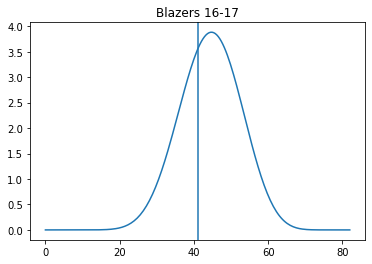

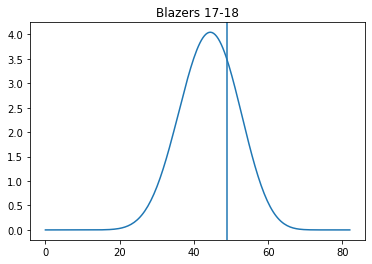

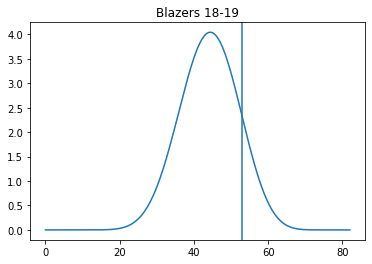

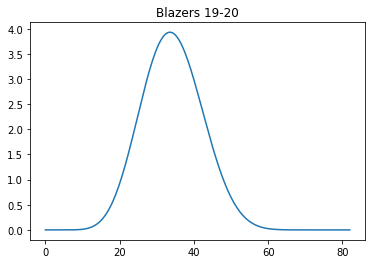

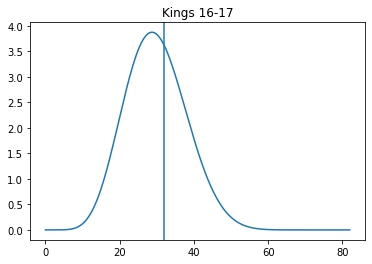

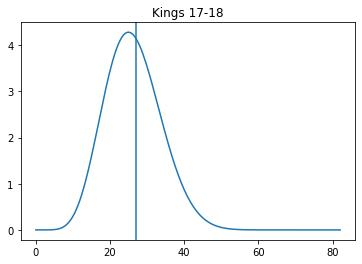

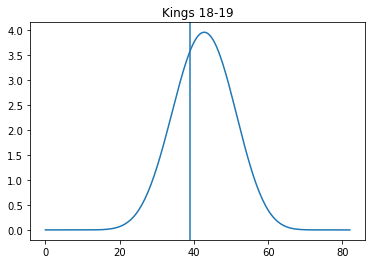

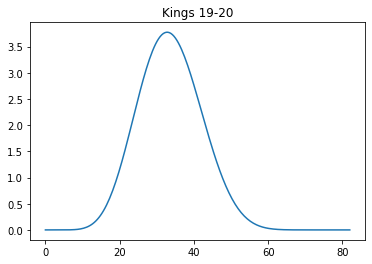

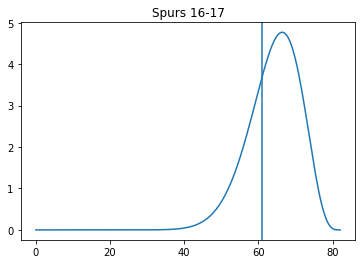

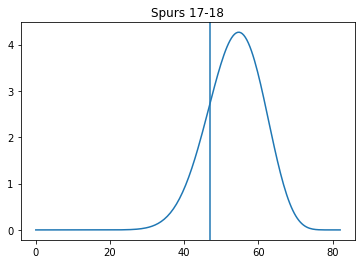

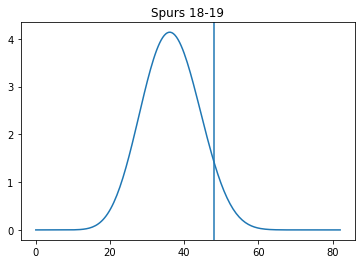

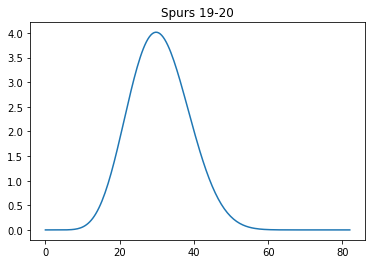

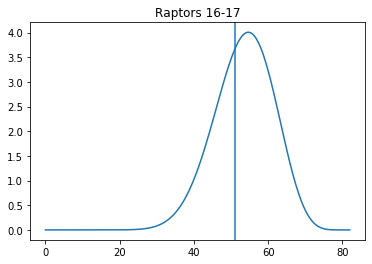

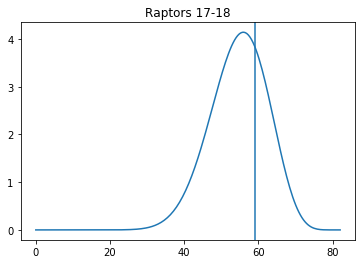

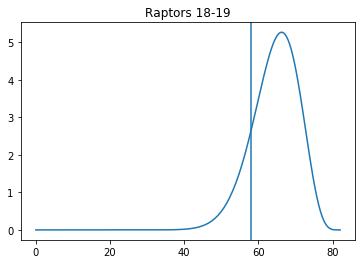

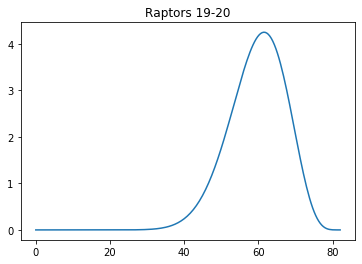

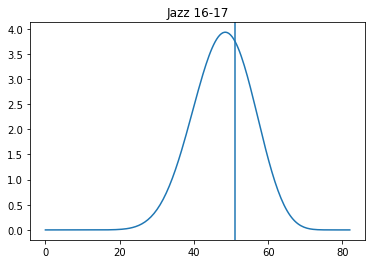

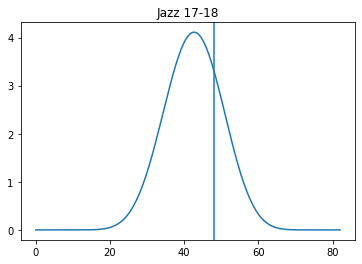

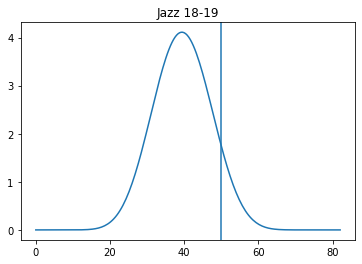

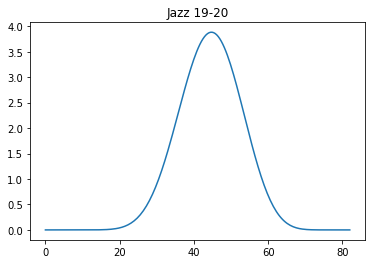

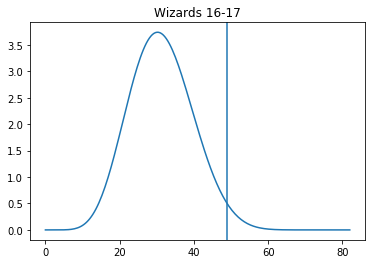

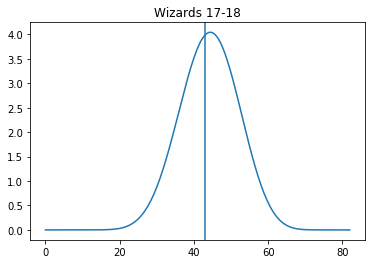

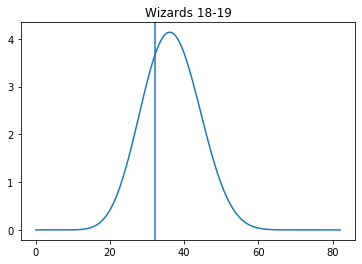

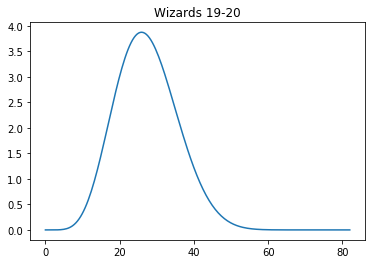

In [46]:
maps = []
l_bound = []
u_bound = []
for i in range(len(dat_clean['Proj'])):
    x = np.linspace(0,1,200)
    y = stats.beta(1 + yy[i], 1 + n[i] - yy[i]).pdf(x)
    maps.append(np.argmax(y))
    l_bound.append(beta.ppf(0.05, 1 + yy[i], 1 + n[i] - yy[i]) * 82)
    u_bound.append(beta.ppf(0.95, 1 + yy[i], 1 + n[i] - yy[i]) * 82)

    plt.plot(x *82, y)
    plt.title(str(dat_clean["Team"][i]) + " " +str(dat_clean["Year"][i]))
    plt.axvline(x=dat_clean["Final"][i])
    plt.show()

In [47]:
dat_final = dat_clean["Final"][np.logical_not(np.isnan(dat_clean["Final"]))]
dat_final = np.asarray(dat_final)
l_bound = np.asarray(l_bound)
u_bound = np.asarray(u_bound)
l_bound1 = np.delete(l_bound, np.arange(3, l_bound.size, 4))
u_bound1 = np.delete(u_bound, np.arange(3, u_bound.size, 4))

l_bound1
u_bound1

count = 0
for j in range(len(test)):
    if(dat_final[j] > l_bound1[j]) & (test[j] < u_bound1[j]):
        count = count + 1

count / len(test)


0.9555555555555556

In [48]:
#95.55% for flat prior. 